# **20230529**

## **05 회귀**

### **01. 회귀 소개**

: 회귀는 여러개의 독립변수(컬럼, 피처)와 한 개의 종속변수(답) 간의 상관관계를 모델링하는 기법
<br>

- 회귀의 **예측값**은 분류(카테고리/이산형)와 달리 **연속형 숫자** 값



##### ㅇ 선형회귀식

$ Y = W_1 * X_1 + W_2 * X_2 + W_3 * X_3 + ... +W_n * X_n  $

W : 가중치 = 결정계수 = ***회귀계수(Regression coefficients)***

<br>

=> 머신러닝 회귀 예측의 핵심은 주어진 피처와 결정값 데이터 기반에서 학습을 통해  **최적의 회귀 계수** 를 찾아내는 것



##### ㅇ 회귀 유형 구분

| 독립변수 개수  | 회귀 계수의 결합|
|:-------------:|:---------------:|
|1개 : 단일 회귀 |  선형: 선형 회귀|
|여러개 : 다중 회귀|비선형 : 비선형 회귀|

- 회귀 계수가 선형이나 아니냐에 따라 ***선형 회귀***와 ***비선형 회귀***로 나눌 수 있음
- 독립 변수의 개수가 한 개인지 여러개 인지에 따라 ***단일 회귀***, ***다중 회귀***로 나뉨

#### O 선형 회귀

- 선형 회귀는 실제 값과 예측값의 차이(오류의 제곱 값)를 최소화하는 직선형 회귀선을 최적화 하는 방식


- 여러가지 회귀 중 선형회귀가 가장 많이 사용됨


- 선형 회귀 모델은 **규제** 방법에 따라 나뉨

+) **규제** : 과적합 문제를 해결하기 위해 *회귀 계수에 페널티 값을 적용*하는 것


|선형 회귀 모델 |설명|
|:------------:|----|
|일반 선형 회귀 (Linear Regression)|예측값과 실제값의 RSS(Residual Sum of Square)를 최소화 할 수 있도록 회귀 계수를 최적화하며, 규제를 적용하지 않은 모델|
|릿지(Ridge) 회귀                  |선형 회귀에 **L2 규제**를 추가한 회귀모델. <br> L2규제는 상대적으로 큰 회귀 계수 값의 예측 영향도를 감소시키기 위해서 ***회귀 계수 값을 더 작게 만드는*** 규제 모델|
|라쏘(Las**so**) 회귀<br>(so:select operate)|선형 회귀에 **L1 규제**를 적용한 방식. <br> L1규제는 **예측 영향력이 작은 피처의 회귀 계수를 0**으로 만들어 회귀 예측 시 피처가 선택되지 않게 하는 것.<br> ==> ***피처 선택 기능***|
|엘라스틱넷(ElasticNet)            |L1, L2 규제를 함께 결합한 모델. <br> 주로 피처가 많은 데이터 세트에 적용 <br> L1 -> 피처의 개수 줄임, L2 -> 상대 계수 값의 크기 조정|
|로지스틱 회귀<br>(Logistic Regression)|분류에 사용되는 회귀 모델. <br> |

##### ㅇ 회귀식

오차 = 원래 답 - 예측값(f(x))

$$ cost function : \frac{1}{N} \sum_i (y_i - \widehat{y_i})^2 = MSE(Mean Squared Error) = RSS(잔차 제곱의 합) $$

$\sum_i (y_i - \widehat{y_i})^2 = RSS $

<br>

- 일반 선형 회귀 : $\frac{\partial F}{\partial W}$

- 릿지 회귀 : $ \frac{\partial F}{\partial W} + \alpha \times L2  $

### **02. 단순 선형 회귀를 통한 회귀 이해**

단순 선형 회귀 : 독립변수도 하나, 종속변수도 하나인 선형 회귀


$$ \widehat{Y}(예측값) = w_0(편차) + w_1(기울기) * X + 오류값(잔차) $$

***=> |잔차|의 합이 최소가 되는 w(회귀계수) 찾기***

- 잔차는 +나- 될 수 있음 <br> ~ 절대값을 취해 더하거나(**MAE**, Mean Absolute Error) <br> , 오류값의 제곱을 구해서 더하는 방식(**RSS**, Residual Sum of Square)을 사용
<br> (일반적으로 미분 등의 계산을 편리하게 하기 위해 RSS사용)

##### ㅇ **RSS**

$  f(x) =  \widehat{Y} = w_0 + w_1 * x_1 $

$$ RSS(w_0,w_1) = \frac{1}{N} \sum_i^N (y_i - (w_0 + w_1 * x_i))^2 = MSE$$



- 회귀에서 RSS는 비용(Cost)이며 w 변수(회귀 계수)로 구성되는 RSS를 비용함수(cost function)이라고 함

- 머신러닝 회귀 알고리즘은 데이터를 계속 학습하면서 비용함수가 반환하는 값(오류값)을 지속해서 감소시키고 최종적으로는 **더 이상 감소하지 않는 최소의 오류 값의 W를 찾는 것**
 

### **03. 비용 최소화 하기 - 경사하강법(Gradient Descent)**

경사하강법 = 점진적 하강 <br>
: 점진적으로 반복적인 계산을 통해 W(i)파라미터 값을 업데이트하면서 오류값이 최소가 되는 W(i+1) 파라미터를 구하는 방식

$ w_{i+1} = w_i - \alpha * (cost) => w_{i+1} \approx w_i $

            => cost가 최소가 되는 상태 :: 학습 종료

#### O RSS(w_0,w_1) = g(f(x)) 결합함수의 **편미분**

- 편미분 : **다변수 함수**의 특정 변수를 제외한 나머지 변수를 상수로 간주하여 미분

<br>

- g(f(x)) w1 편미분(결합함수 미분)

$$ \frac{\partial R(w)}{\partial w_1} = \frac{2}{N} \sum_{i=1}^N -x_i * (y_i - (w_0 + w_1 * x_i)) = -\frac{2}{N} \sum_{i=1}^N x_i * (실제값_i - 예측값_i)$$

- g(f(x)) w0 편미분(결합함수 미분)

$$ \frac{\partial R(w)}{\partial w_0} = \frac{2}{N} \sum_{i=1}^N -(y_i - (w_0 + w_1 * x_i)) = -\frac{2}{N} \sum_{i=1}^N (실제값_i - 예측값_i)$$

#### O **보정 계수 eta ( $ \eta $ ) = 학습률(learning rate)**

: 위 편미분 값이 너무 클 경우를 대비

위의 식에서 alpha로 설명됨

$$ 0 < \eta < 1 $$

$$ W_{i+1} = W_i - \eta * (\frac{\partial cost}{\partial w}) $$

#### O 경사하강법의 과정

1. w1,w0를 임의의 값으로 설정하고 첫 비용함수의값을 계산
2. w1을 $ w_1 + \eta \times \frac{2}{N} \sum_{i=1}^N x_i * (실제값_i - 예측값_i) $,<br>
w0을 $w_0 + \eta \times \frac{2}{N} \sum_{i=1}^N (실제값_i - 예측값_i)$ 으로 업데이트 함 수 다시 비용함수의 값을 계산

3. 비용함수가 감소하는 방향성으로 주어진 횟수만큼 2번 과정을 반복하면서 w1과 w0을 계속 업데이트

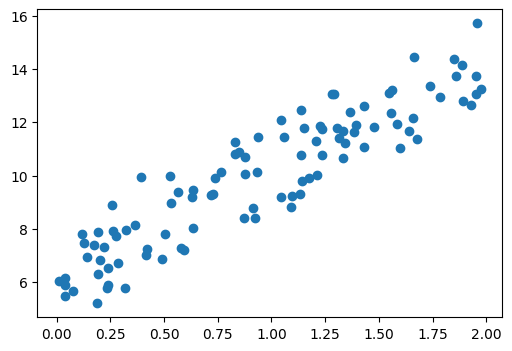

In [1]:
# 실제 값을 Y = 4X + 6 함수를 시뮬레이션하는 데이터 값 생성

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(6,4))
np.random.seed(0)
# y = 4X + 6 식을 근사(w1=4, w0=6). random 값은 Noise를 위해 만듬
X = 2 * np.random.rand(100,1)   # 랜덤값(데이터)(100행,1열)=2차원
y = 6 +4 * X + np.random.randn(100,1)    # Y = 4X + 6 + 오차(np.random.randn(100,1):정규분포를 따름)

# X, y 데이터 셋 scatter plot으로 시각화
plt.scatter(X, y)

plt.show()

In [2]:
X.shape, y.shape

((100, 1), (100, 1))

In [3]:
# MSE
def get_cost(y,y_pred):
    N = len(y)
    cost = np.sum(np.square(y-y_pred))/N
    return cost

##### 예측값 계산

$A_n = \begin{pmatrix}
    a_1 & a_2 & \cdots & a_n
    \end{pmatrix}
$

$B_n = \begin{pmatrix}
    b_1 \\
    b_2 \\
    \vdots \\
    b_n
    \end{pmatrix}
$

<br>

 $ np.dot(A,B) : a_1*b_1 + a_2*b_2 + ... + a_n*b_n  = 내적 $

 $ \widehat y = np.dot(X,w_1.T) + w_0 $

In [4]:
# w1 과 w0 를 업데이트 할 w1_update, w0_update를 반환. 
def get_weight_updates(w1, w0, X, y, learning_rate=0.001):
    N = len(y)
    # 먼저 w1_update, w0_update를 각각 w1, w0의 shape와 동일한 크기를 가진 0 값으로 초기화
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)
    # 예측 배열 계산하고 예측과 실제 값의 차이 계산
    y_pred = np.dot(X, w1.T) + w0
    diff = y-y_pred
         
    # w0_update를 dot 행렬 연산으로 구하기 위해 모두 1값을 가진 행렬 생성 
    w0_factors = np.ones((N,1))

    # w1과 w0을 업데이트할 w1_update와 w0_update 계산
    w1_update = -(2/N)*learning_rate*(np.dot(X.T, diff))
    w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T, diff))    
    
    return w1_update, w0_update

In [5]:
# 입력 인자 iters로 주어진 횟수만큼 반복적으로 w1과 w0를 업데이트 적용함. 
def gradient_descent_steps(X, y, iters=10000):
    # w0와 w1을 모두 0으로 초기화. 
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    
    # 인자로 주어진 iters 만큼 반복적으로 get_weight_updates() 호출하여 w1, w0 업데이트 수행. 
    for ind in range(iters):
        w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
              
    return w1, w0

In [6]:
# w1은 4(기울기)의 근사치, w0은 6(절편)의 근사치여야함

w1, w0 = gradient_descent_steps(X, y, iters=1000)
print("w1:{0:.3f} w0:{1:.3f}".format(w1[0,0], w0[0,0]))

w1:4.022 w0:6.162


In [7]:
# w1, w0 = gradient_descent_steps(X, y, iters=10000)
# print("w1:{0:.3f} w0:{1:.3f}".format(w1[0,0], w0[0,0]))
# # w1:3.968 w0:6.222

In [8]:
y_pred = w1[0,0] * X + w0
print(y_pred[:5],'\n length:' , len(y_pred))

[[10.5764825 ]
 [11.91474793]
 [11.01043516]
 [10.54486846]
 [ 9.56975253]] 
 length: 100


In [9]:
# MSE
print('gradient_descent cost :',get_cost(y,y_pred))

gradient_descent cost : 0.9934784315632568


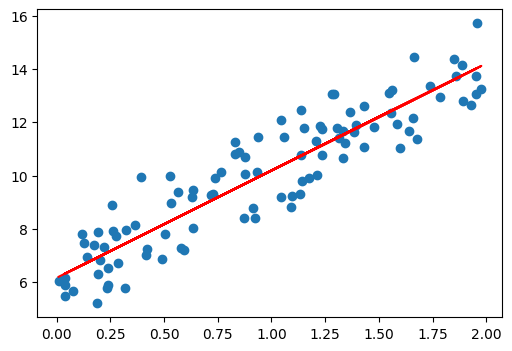

In [10]:
plt.figure(figsize=(6,4))

plt.scatter(X,y)
plt.plot(X, y_pred,'r')

plt.show()

#### O (미니 배치)**확률적 경사하강법(Stochastic Gradient Descnet)**

: 전체 입력 데이터로 w가 업데이트 되는 값을 계산하는 것이 아니라 **일부**데이터만 이용해 w가 업데이트되는 값을 계산<br> => 경사하강법에 비해 ***빠른 속도***

In [11]:
def stochastic_gradient_descent_steps(X, y, batch_size=10, iters=1000):
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    prev_cost = 100000
    iter_index =0
    
    for ind in range(iters):
        np.random.seed(ind)
        # 전체 X, y 데이터에서 랜덤하게 batch_size만큼 데이터 추출하여 sample_X, sample_y로 저장
        stochastic_random_index = np.random.permutation(X.shape[0])
        sample_X = X[stochastic_random_index[0:batch_size]]
        sample_y = y[stochastic_random_index[0:batch_size]]
        # 랜덤하게 batch_size만큼 추출된 데이터 기반으로 w1_update, w0_update 계산 후 업데이트
        w1_update, w0_update = get_weight_updates(w1, w0, sample_X, sample_y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
    
    return w1, w0

In [12]:
w1, w0 = stochastic_gradient_descent_steps(X, y, iters=1000)
print("w1:",round(w1[0,0],3),"w0:",round(w0[0,0],3))

w1: 4.028 w0: 6.156


In [13]:
y_pred = w1[0,0] * X + w0
print(y_pred[:5],'\n length:' , len(y_pred))

print('\n stochastic gradient descent cost :',get_cost(y,y_pred))

[[10.57798907]
 [11.9184005 ]
 [11.01263761]
 [10.54632434]
 [ 9.56964474]] 
 length: 100

 stochastic gradient descent cost : 0.9937111256675345


#### 다항 회귀식

- 피처가 100개인 다항 회귀식

$ \widehat Y = w_0 + w_1 * X_1 + w_2 * X_2 + \cdots + w_100 * X_100$

<br>

- 데이터의 개수가 n개 이고 피처의 개수가 m개의 입력 행렬 *(내적) 회귀계수배열.T

$$

\begin{pmatrix}
    y_1 \\
    y_2 \\
    \vdots \\
    y_n
\end{pmatrix}
=
 \begin{pmatrix}
  x_{1,1} & x_{1,2} & \cdots & x_{1m} \\
  x_{2,1} & x_{2,2} & \cdots & x_{2m} \\
  \vdots  & \vdots  & \ddots & \vdots  \\
  x_{n1} & x_{n2} & \cdots & x_{nm}
 \end{pmatrix}
 *
\begin{pmatrix}
    w_1 & w_2 & \cdots & w_m
\end{pmatrix}^T
+ w_0

 $$

### **04. 사이킷런 LinearRegression을 이용한 보스턴 주택 가격 예측**

#### O LinearRegression 클래스 - Ordinary Least Squares(최소제곱법)

: 예측값과 실제값의 RSS를 최소화해 OLS(Ordinary Least Square)추정 방식으로 구현한 클래스

|`|`|
|---|---|
|입력 파라미터| - **fit_intercept**: default='True'<br> 절편 값을 계산할 것인지 말지를 지정  <br>False~ intercept(절편)=0  <br> - **normalize** : default = 'False', <br> fit_intercept가 False인 경우 무시됨 <br> True~ 회귀 수행 전 입력데이터 세트 *정규화* <br>| 
|속성|- **coef_** : fit() 메서드를 수행했을 때 회귀계수가 배열 형태로 저장하는 속성 <br> Shape(target, feature) <br> - **intercept_**: intercept(절편) 값|

<br>

- OLS 기반의 회귀계수계산은 입력 피처의 **독립성**에 많은 영향을 받음
<br>-> 피처간의 상관관계가 매우 높은 경우 분산이 매우 커져서 오류에 매우 민감해짐
<br> => **다중공선성**(multi-collinearity) 문제
<br> ~ 독립적인 중요 피처만 남기고 ***제거 or 규제 or 차원 축소***

#### @ **회귀 평가 지표**

- ***MAE, MSE, RMSE : 오차 함수***
- $R^2$ : 예측 ***성능*** 평가 (통계 ~ 원래 답을 얼마나 잘 설명하는가(설명력))

|평가 지표|설명|수식|
|---------|---|----|
|MAE|Mean Absolute Error <br> 실제값과 예측값의 차이를 **절댓값**으로 변환해 평균한 것| $ MAE = \frac{1}{n} \displaystyle\sum_{i=1}^n \| Y_i - \widehat{Y_i}\| $ |
|MSE|Mean Square Error <br> 실제 값과 예측값의 차이를 **제곱해 평균**한 것|$ MSE = \frac{1}{n} \displaystyle\sum_{i=1}^n (Y_i - \widehat{Y_i})^2 $ |
|RMSE|Root Mean Square Error  <br> MSE에 **루트**| $ RMSE = \sqrt {\frac{1}{n} \displaystyle\sum_{i=1}^n (Y_i - \widehat{Y_i})^2} $ | 
|$R^2$| 분산(Variance) 기반으로 예측 성능 평가 <br> 실제값의 분산 대비 예측값의 분산 비율(0~1) <br> 1에 가까울 수록 **예측 정확도**가 높다.| $$R^2 = \frac{예측값 Variance}{실제값 Variance}$$ |



##### ㅇ 평가방법의 사이킷럿 API, cross_val_score / GridSearchCV의 scoring 파라미터 적용 값

- 음수(**negative**)값 가져야함 <br> -> 사이킷런의 scoring함수가 socre값이 클수록 좋은 평가 결과로 자동 평가함<br> ~ 오차는 작을 수록 좋음 <br>~ 일반적인 반영을 위해 ( - ) 붙여 보정함 


|평가 방법|사이킷런 평가 지표 API|Scoring 함수 적용 값|
|--------|:----------------------:|-------------------|
|MAE|metrics.mean_absolute_error|'neg_mean_absolute_error'|
|MSE|metrics.mean_squared_error|'neg_mean_squared_error'|
|RMSE|metrics.mean_squared_error,<br> squared parameter=False|'neg_root_mean_squared_error'|
|MSLE|metrics.mean_squared_log_error|'neg_mean_squared_log_error'|
|$R^2$|metrics.r2_score|'r2'|

#### O LinearRegression을 이용해 **보스턴 주택가격 회귀 구현**


피처 설명

- CRIM :지역별 범죄 발생률
- ZN : 25,000평방 피트를 초과하는 거주 지역의 비율
- INDUS : 비상업 지역 넓이 비율
- CHAS : 찰스강에 대한 더비 변수(강의 경계 = 1, or 0)
- NOX : 일산화질소 농도
- RM : 거주할 수 있는 방 개수
- AGE : 1940년 이전에 건축된 소유 주택의 비율
- DIS : 5개 주요 고용센터까지의 가중 거리
- RAD : 고속도로 접근 용이도
- TAX : 10,000달러당 재산세율
- PTRATIO : 지역의 교사와 학생 수 비율
- B : 지역의 흑인 거주 비율
- LSTAT : 하위 계층의 비율
- MEDV : 본인 소유의 주택 가격(중앙값) -> PRICE


In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
# from sklearn.datasets import load_boston
import warnings
warnings.filterwarnings('ignore')  #사이킷런 1.2 부터는 보스턴 주택가격 데이터가 없어진다는 warning 메시지 출력 제거
%matplotlib inline

# boston 데이터셋 로드
bostonDF = pd.read_csv('../data/boston_house_prices.csv', header=1)

In [15]:
bostonDF.rename(columns={'MEDV':'PRICE'}, inplace=True)
print('Boston 데이터셋 크기 :',bostonDF.shape)
bostonDF.head()

Boston 데이터셋 크기 : (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [16]:
# 보스턴 주택 가격 데이터셋 생성 함수

def get_boston_df():
    
    bostonDF = pd.read_csv('../data/boston_house_prices.csv', header=1)
    bostonDF.rename(columns={'MEDV':'PRICE'}, inplace=True)

    return bostonDF

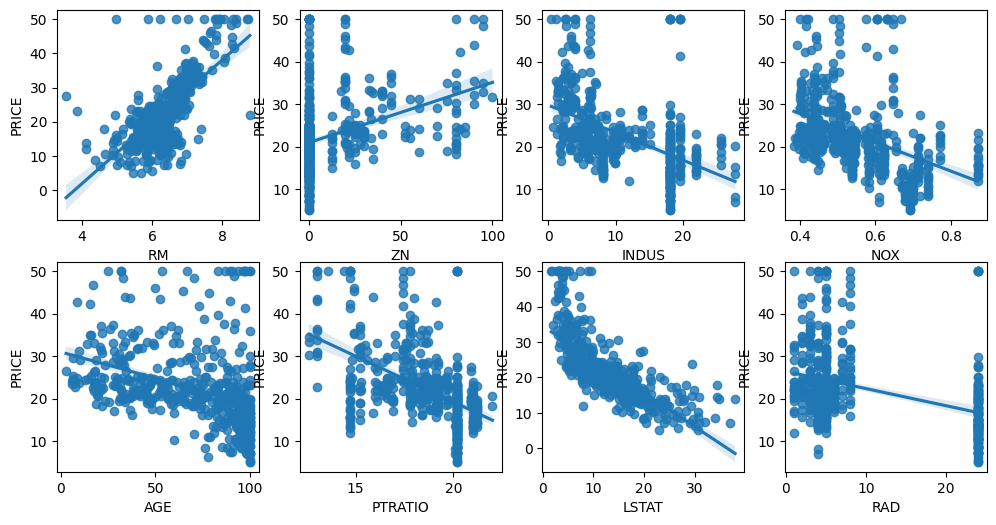

In [17]:
# 회귀에서는 상관 관계 확인 작업 필요

# ZN, INDUS, NOX, RM, AGE, RAD, PTRATIO, LSTAT

# 2개의 행과 4개의 열을 가진 subplots를 이용. axs는 4x2개의 ax를 가짐.
fig, axs = plt.subplots(figsize=(12,6) , nrows=2, ncols=4 )
lm_features = ['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']
for i , feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    # 시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
    sns.regplot(x=feature , y='PRICE',data=bostonDF , ax=axs[row][col])#상관관계 뽑는 plot

fig1 = plt.gcf()
fig1.savefig('p322_boston.tif', format='tif', dpi=300, bbox_inches='tight')

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'],axis=1,inplace=False)

X_train , X_test , y_train , y_test = train_test_split(X_data , y_target ,test_size=0.3, random_state=156)

# Linear Regression OLS로 학습/예측/평가 수행. 
lr = LinearRegression()
lr.fit(X_train ,y_train )
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE : 17.297 , RMSE : 4.159
Variance score : 0.757


In [19]:
bostonDF.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

In [20]:
print('절편 값:',lr.intercept_)
print('회귀 계수값:', np.round(lr.coef_, 1))
# CHAS(3.0), RM(3.4) -> 유의미한 양의 관계를 보임
# NOX(-19.8) -> 유의미한 음의 관계를 보임

절편 값: 40.99559517216429
회귀 계수값: [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [21]:
# 회귀 계수를 큰 값 순으로 정렬하기 위해 Series로 생성. index가 칼럼명에 유의
coeff = pd.Series(data=np.round(lr.coef_, 1), index=X_data.columns )
coeff.sort_values(ascending=False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
INDUS       0.0
AGE         0.0
TAX        -0.0
B           0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

In [22]:
from sklearn.model_selection import cross_val_score

y_target = bostonDF['PRICE']        # 주택가격 : 답
X_data = bostonDF.drop(['PRICE'],axis=1,inplace=False)  # 데이터 추출
lr = LinearRegression()

# cross_val_score( )로 5 Fold 셋으로 MSE 를 구한 뒤 이를 기반으로 다시  RMSE 구함. 
neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
rmse_scores  = np.sqrt(-1 * neg_mse_scores) # neg -> - 보정되어있어 루트 씌우기 위해 한번 더 -1 곱함 
avg_rmse = np.mean(rmse_scores)

# cross_val_score(scoring="neg_mean_squared_error")로 반환된 값은 모두 음수 
print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 2))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores, 2))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))


 5 folds 의 개별 Negative MSE scores:  [-12.46 -26.05 -33.07 -80.76 -33.31]
 5 folds 의 개별 RMSE scores :  [3.53 5.1  5.75 8.99 5.77]
 5 folds 의 평균 RMSE : 5.829 


In [23]:
y_target = bostonDF['PRICE']        # 주택가격 : 답
X_data = bostonDF.drop(['PRICE'],axis=1,inplace=False)  # 데이터 추출

# X_train , X_test , y_train , y_test = train_test_split(X_data , y_target ,test_size=0.3, random_state=156)


lr = LinearRegression()
r2_scores = cross_val_score(lr, X_data, y_target, scoring="r2", cv = 5)
print(r2_scores)

# y_preds = np.mean(r2_scores).predict(X_test)
# print('R2 score : {0:.3f}'.format(r2_score(y_test, y_preds)))

[ 0.63919994  0.71386698  0.58702344  0.07923081 -0.25294154]


---

# **20230530**

### **05. 다항 회귀와 과(대)적합/과소적합 이해**

#### O 다항(Polynomial) 회귀의 이해

: 회귀가 독립변수의 단항식이 아닌 2,3차 방정식과 같은 다항식으로 표현 되는 것(곡선)


예시)

$ y = w_0 + w_1*x_1 + w_2*x_2 + w_3*x_1*x_2 + w_4*x_1^2 + w_5*x_2^2 (1) $


- **다항 회귀는 선형 회귀**

: 머신러닝에서 독립변수(x)는 **`상수`** 이므로 회귀계수w가 기준 => w가 1차식 이라면 항상 선형

- ***선형/비선형은 회귀계수가 선형/비선형인지에 따름 -> 독립변수의 선형/비선형 여부 관련 없음***

- x에 대한 그래프를 그린다면 아래와 같이 곡선형이 나올 수 있다.

- 비선형이 선형보다 성능이 좋다(오차가 작다.)

- (원래 sigmoid 함수는 선형 함수를 비선형(곡선)으로 변형해주는 역할(activation))

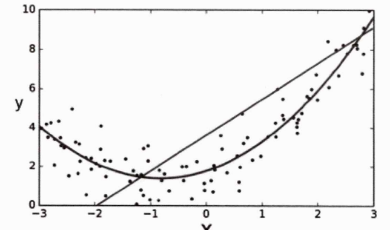

In [24]:
from IPython.display import Image
Image('./ch05_다항회귀.png')

- PolynomialFeatures : 단항 -> 다항  ==> 전처리, fit()X

 : 원래 있는 각각의 피처들의 특징을 결합하여 피처를 늘림

        parameter : degree=차수

- ***차수가 커질 수록 과대적합되어 일반화 성능이 떨어질 수 있다.***

- -> 과대적합된 다항회귀식을 규제를 통해 뭉갤 수 있다.(과대적합 방지)

In [25]:
# PolynomialFeatures 

from sklearn.preprocessing import PolynomialFeatures
import numpy as np

# 다항식으로 변환한 단항식 생성, [[0,1],[2,3]]의 2X2 행렬 생성
X = np.arange(4).reshape(2,2)
print('일차 단항식 계수 feature:\n',X )

# degree = 2 인 2차 다항식으로 변환하기 위해 PolynomialFeatures를 이용하여 변환
poly = PolynomialFeatures(degree=2)
poly.fit(X)
poly_ftr = poly.transform(X)
print('변환된 2차 다항식 계수 feature:\n', poly_ftr)


일차 단항식 계수 feature:
 [[0 1]
 [2 3]]
변환된 2차 다항식 계수 feature:
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


#### O 다항 회귀를 이용한 과소적합 및 과적합 이해

- 곡선 => 과대적합
- 선형 => 과소적합


-> degree 크기 조정을 통해 과적합 제어 ~ degree = hyper parameter

#### O 편향-분산 트레이드오프(Bias-Variance Trade off)

- 편향 : 치우쳐진 정도
- 분산 : 퍼져있는 정도

: 이상적인 모델은 저편향/저분산

 - degree 가 커질수록 모델의 복잡도가 올라감 => 저편향, 고분산
 - 편향과 분산은 트레이드오프되는 그래프를 그림-> 두 그래프의 교차점은 오류가 가장 낮은 '골디락스' 지점이라고 불림


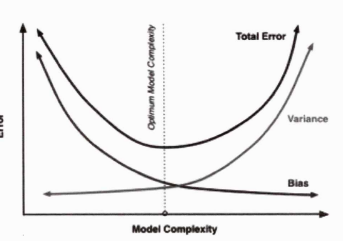

In [26]:
Image('./ch05_골디락스.png')

### **06. 규제 선형 모델 - 릿지,라쏘,엘라스틱넷**

- 규제의 목적 : 일반화 성능 높히기

#### O 규제 선형 모델의 개요

- 최적 모델을 위한 cost 함수 구성 요소 = 학습데이터 잔차 오류 최소화 + 회귀계수 크기 제어(=규제)

- 회귀계수의 크기를 제어해 과적합을 개선하기 위한 비용(cost) 함수


$$Cost function = RSS(W) +\alpha * \parallel W \parallel_2$$

$$ 비용 함수 목표 = Min(RSS(W) + \alpha * \parallel W \parallel_2) $$ 

<br>

- $\alpha$ : 학습데이터 적합 정도와 회귀 계수 값의 크기를 제어를 수행하는 ***튜닝 파라미터***


- $\alpha$가 0(또는 매우 작은 값)이라면 W 값이 커져도 어느정도 상쇄가능 => 학습 데이터 적합 개선, <br> $\alpha$가 무한대(또는 매우 큰 값)라면 비용함수는 W의 값을 작게 해 과적합 개선

<br>

- $ \parallel W \parallel_2 $ : L2 규제 = 릿지

- $ \parallel W \parallel_1 $ : L1 규제 = 라쏘

#### O 릿지 회귀 = L2 규제

- 주요 생성 파라미터 : alpha = L2 규제 계수

- **독특하게 큰 회귀계수를 감소**시켜 회귀식을 뭉갬

In [27]:
# r2_scores 따로 실행해보기

from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

bostonDF = pd.read_csv('../data/boston_house_prices.csv', header=1)
bostonDF.rename(columns={'MEDV':'PRICE'}, inplace=True)


y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'],axis=1,inplace=False)


ridge = Ridge(alpha = 10)
neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)
print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 3))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores,3))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))

 5 folds 의 개별 Negative MSE scores:  [-11.422 -24.294 -28.144 -74.599 -28.517]
 5 folds 의 개별 RMSE scores :  [3.38  4.929 5.305 8.637 5.34 ]
 5 folds 의 평균 RMSE : 5.518 


In [28]:
# 릿지에 사용될 alpha 파라미터의 값을 정의
alphas = [0, 0.1, 1, 10, 100]

# alphas list 값을 반복하면서 alpha에 따른 평균 rmse를 구함.
for alpha in alphas :
    ridge = Ridge(alpha = alpha)
    
    # cross_val_score를 이용해 5 폴드의 평균 RMSE를 계산
    neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    print('alpha {0} 일 때 5 folds 의 평균 RMSE : {1:.3f} '.format(alpha, avg_rmse))

alpha 0 일 때 5 folds 의 평균 RMSE : 5.829 
alpha 0.1 일 때 5 folds 의 평균 RMSE : 5.788 
alpha 1 일 때 5 folds 의 평균 RMSE : 5.653 
alpha 10 일 때 5 folds 의 평균 RMSE : 5.518 
alpha 100 일 때 5 folds 의 평균 RMSE : 5.330 


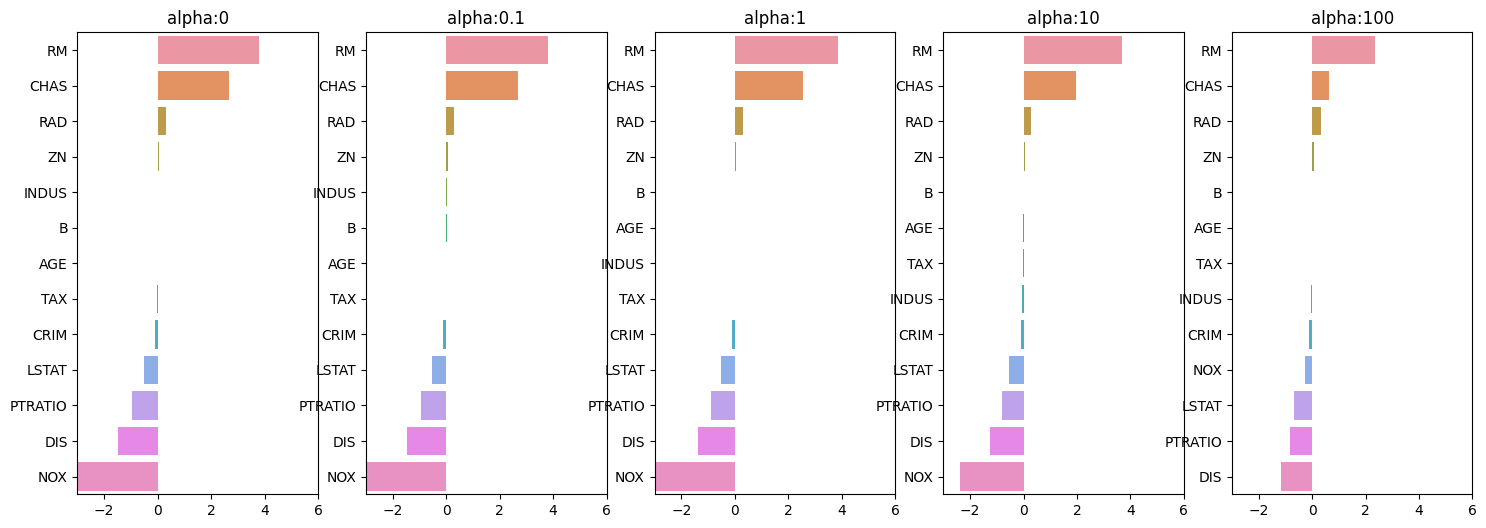

In [29]:
# 각 alpha에 따른 회귀 계수 값을 시각화하기 위해 5개의 열로 된 맷플롯립 축 생성  
fig , axs = plt.subplots(figsize=(18,6) , nrows=1 , ncols=5)
# 각 alpha에 따른 회귀 계수 값을 데이터로 저장하기 위한 DataFrame 생성  
coeff_df = pd.DataFrame()

# alphas 리스트 값을 차례로 입력해 회귀 계수 값 시각화 및 데이터 저장. pos는 axis의 위치 지정
for pos , alpha in enumerate(alphas) :
    ridge = Ridge(alpha = alpha)
    ridge.fit(X_data , y_target)
    # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가.  
    coeff = pd.Series(data=ridge.coef_ , index=X_data.columns )
    colname='alpha:'+str(alpha)
    coeff_df[colname] = coeff
    # 막대 그래프로 각 alpha 값에서의 회귀 계수를 시각화. 회귀 계수값이 높은 순으로 표현
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3,6)
    sns.barplot(x=coeff.values , y=coeff.index, ax=axs[pos])

# for 문 바깥에서 맷플롯립의 show 호출 및 alpha에 따른 피처별 회귀 계수를 DataFrame으로 표시
plt.show()

In [30]:
# 알파 값이 증가하면 회귀계수가 작아지나 릿지 회귀는 회귀계수를 0으로 만들지는 않음

#### O 라쏘 회귀 = L1 규제

- 불필요한 회귀 계수를 0으로 만들 수 있음 -> 피처 선택 특성  => 차원 축소(= PCA = 새로운 축을 만드는 것)


$$ Lasso = RSS(W) +\alpha * \sum \parallel W \parallel_1 $$

In [31]:
from sklearn.linear_model import Ridge,Lasso, ElasticNet

# alpha값에 따른 회귀 모델의 폴드 평균 RMSE를 출력하고 회귀 계수값들을 DataFrame으로 반환 
def get_linear_reg_eval(model_name, params=None, X_data_n=None, y_target_n=None, 
                        verbose=True, return_coeff=True):
    coeff_df = pd.DataFrame()
    if verbose : print('####### ', model_name , '#######')
    for param in params:
        if model_name =='Ridge': model = Ridge(alpha=param)
        elif model_name =='Lasso': model = Lasso(alpha=param)
        elif model_name =='ElasticNet': model = ElasticNet(alpha=param, l1_ratio=0.7)
        neg_mse_scores = cross_val_score(model, X_data_n, 
                                             y_target_n, scoring="neg_mean_squared_error", cv = 5)
        avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
        print('alpha {0}일 때 5 폴드 세트의 평균 RMSE: {1:.3f} '.format(param, avg_rmse))
        # cross_val_score는 evaluation metric만 반환하므로 모델을 다시 학습하여 회귀 계수 추출
        
        model.fit(X_data_n , y_target_n)
        if return_coeff:
            # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가. 
            coeff = pd.Series(data=model.coef_ , index=X_data_n.columns )
            colname='alpha:'+str(param)
            coeff_df[colname] = coeff
    
    return coeff_df
# end of get_linear_regre_eval

In [32]:
# 라쏘에 사용될 alpha 파라미터의 값들을 정의하고 get_linear_reg_eval() 함수 호출
lasso_alphas = [ 0.07, 0.1, 0.5, 1, 3]
coeff_lasso_df =get_linear_reg_eval('Lasso', params=lasso_alphas, X_data_n=X_data, y_target_n=y_target)

#######  Lasso #######
alpha 0.07일 때 5 폴드 세트의 평균 RMSE: 5.612 
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.615 
alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 5.669 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.776 
alpha 3일 때 5 폴드 세트의 평균 RMSE: 6.189 


In [33]:
# 반환된 coeff_lasso_df를 첫번째 컬럼순으로 내림차순 정렬해 회귀계수 DataFrame 출력

sort_column = 'alpha:' + str(lasso_alphas[0])
coeff_lasso_df.sort_values(by=sort_column, ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.789725,3.703202,2.498212,0.949811,0.000000
CHAS,1.434343,0.955190,0.000000,0.000000,0.000000
RAD,0.270936,0.274707,0.277451,0.264206,0.061864
ZN,0.049059,0.049211,0.049544,0.049165,0.037231
B,0.010248,0.010249,0.009469,0.008247,0.006510
NOX,-0.000000,-0.000000,-0.000000,-0.000000,0.000000
AGE,-0.011706,-0.010037,0.003604,0.020910,0.042495
TAX,-0.014290,-0.014570,-0.015442,-0.015212,-0.008602
INDUS,-0.042120,-0.036619,-0.005253,-0.000000,-0.000000
CRIM,-0.098193,-0.097894,-0.083289,-0.063437,-0.000000


#### O 엘라스틱넷 회귀 = L1 + L2

: L2 규제와 L1 규제를 결합한 회귀

- 수행시간이 오래걸림

In [34]:
 # 엘라스틱넷에 사용될 alpha 파라미터의 값들을 정의하고 get_linear_reg_eval() 함수 호출
# l1_ratio는 0.7로 고정
elastic_alphas = [ 0.07, 0.1, 0.5, 1, 3]
coeff_elastic_df =get_linear_reg_eval('ElasticNet', params=elastic_alphas,
                                      X_data_n=X_data, y_target_n=y_target)

#######  ElasticNet #######
alpha 0.07일 때 5 폴드 세트의 평균 RMSE: 5.542 
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.526 
alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 5.467 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.597 
alpha 3일 때 5 폴드 세트의 평균 RMSE: 6.068 


In [35]:
# 반환된 coeff_elastic_df를 첫번째 컬럼순으로 내림차순 정렬하여 회귀계수 DataFrame출력
sort_column = 'alpha:'+str(elastic_alphas[0])
coeff_elastic_df.sort_values(by=sort_column, ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.574162,3.414154,1.918419,0.938789,0.000000
CHAS,1.330724,0.979706,0.000000,0.000000,0.000000
RAD,0.278880,0.283443,0.300761,0.289299,0.146846
ZN,0.050107,0.050617,0.052878,0.052136,0.038268
B,0.010122,0.010067,0.009114,0.008320,0.007020
AGE,-0.010116,-0.008276,0.007760,0.020348,0.043446
TAX,-0.014522,-0.014814,-0.016046,-0.016218,-0.011417
INDUS,-0.044855,-0.042719,-0.023252,-0.000000,-0.000000
CRIM,-0.099468,-0.099213,-0.089070,-0.073577,-0.019058
NOX,-0.175072,-0.000000,-0.000000,-0.000000,-0.000000


#### O 선형 회귀 모델을 위한 데이터 변환

: 정규 분포 형태로 변환

---

# **20230531** 

In [36]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [37]:
def get_scaled_data(method='None', p_degree=None, input_data=None):
    if method=='Standard':
        scaled_data = StandardScaler().fit_transform(input_data)
    elif method =='MinMax':
        scaled_data = MinMaxScaler().fit_transform(input_data)
    elif method == 'Log':
        scaled_data = np.log1p(input_data)
    else:
        scaled_data = input_data

    if p_degree != None:
        scaled_data = PolynomialFeatures(degree=p_degree
                                         ,include_bias=False
                                         ).fit_transform(scaled_data)

    return scaled_data

In [38]:
alphas = [0.1,1,10,100]

scale_methods = [(None,None),('Standard',None),('Standard',2),
                 ('MinMax',None),('MinMax',2),('Log',None)]

for scale_method in scale_methods:
    X_data_scaled = get_scaled_data(method=scale_methods[0]
                                    ,p_degree=scale_method[1]
                                    ,input_data=X_data)
    print('\n ## 변환유형:{0}, Poynomial Degree:{1}'.format(scale_method[0]
                                                        ,scale_method[1]))
    get_linear_reg_eval('Ridge', params=alphas, X_data_n=X_data_scaled
                        , y_target_n=y_target, verbose=False, return_coeff=False)


 ## 변환유형:None, Poynomial Degree:None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.788 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.653 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.518 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 5.330 

 ## 변환유형:Standard, Poynomial Degree:None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.788 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.653 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.518 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 5.330 

 ## 변환유형:Standard, Poynomial Degree:2
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 9.141 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 8.938 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 10.556 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 10.566 

 ## 변환유형:MinMax, Poynomial Degree:None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.788 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.653 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.518 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 5.330 

 ## 변환유형:MinMax, Poynomial Degree:2
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 9.141 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 8.938 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 10.556 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 10.566 

 ## 변환유형:Log, Poynomial Degree:None
alpha 0.1일 때 5 폴드 

### **07. 로지스틱 회귀**(Logistic Regression)

: 선형 회귀 방식을 **분류**에 적용한 알고리즘

- 로지스틱 회귀는 학습을 통해 시그모이드(sigmoid)함수 최적선을 찾고 이 시그모이드 함수의 반환 값을 확률로 간주해 확률에 따라 분류를 결정

 시그모이드 함수
 
: $$ S(x) = \frac{1}{1+e^{-z}} = \frac{1}{1+\frac{1}{e^z}}$$ 
 
  $$ z = w_0 + w_1*x $$

- z가 클수록 결과 값 1에 근사, 작을수록 0에 근사

- y값은 항상 0과 1 사이 값 x=0 ~ y=0.5

<br>

- 선형(z) => 비선형(sigmoid)


##### ㅇ Logistic Regression

parameter : 

- lbfgs

- liblinear :  다차원(피처 많은 경우)

- lewton-cg : 좀 더 정교한 최적화 가능, 대용량데이터 시간 오래 걸림

- sag : 

- saga : 경사하강법 + alpha

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

cancer = load_breast_cancer()

In [40]:
cancer.data[0,:]

array([1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
       3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
       8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
       3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
       1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01])

In [41]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# StandardScaler( )로 평균이 0, 분산 1로 데이터 분포도 변환
scaler = StandardScaler()
data_scaled = scaler.fit_transform(cancer.data)

X_train , X_test, y_train , y_test = train_test_split(data_scaled, cancer.target, test_size=0.3, random_state=0)

In [42]:
from sklearn.metrics import accuracy_score, roc_auc_score

# 로지스틱 회귀를 이용하여 학습 및 예측 수행.
# solver 인자값을 생성자로 입력하지 않으면 solver='lbfgs'
lr_clf = LogisticRegression()   # 오브젝트 => 실행된다. => 학습가능해진다
lr_clf.fit(X_train, y_train)    # 학습 => 모델(함수)생성
lr_preds = lr_clf.predict(X_test)   #예측

# accuracy와 roc_auc 측정
print('accuracy: {0:.3f}, roc_auc:{1:.3f}'.format(accuracy_score(y_test, lr_preds), # 원래 답, 예측값
                                                  roc_auc_score(y_test , lr_preds)))    


accuracy: 0.977, roc_auc:0.972


In [43]:

solvers = ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga']

# 여러개의 solver 값별로 LogisticRegression 학습 후 성능 평가
for solver in solvers:
    lr_clf = LogisticRegression(solver=solver, max_iter=600)
    lr_clf.fit(X_train, y_train)
    lr_preds = lr_clf.predict(X_test)
    
    # accuracy와 roc_auc 측정
    print('solver:{0}, accuracy: {1:.3f}, roc_auc:{2:.3f}'.format(solver,
                                                                  accuracy_score(y_test, lr_preds),
                                                                  roc_auc_score(y_test , lr_preds)))


solver:lbfgs, accuracy: 0.977, roc_auc:0.972
solver:liblinear, accuracy: 0.982, roc_auc:0.979
solver:newton-cg, accuracy: 0.977, roc_auc:0.972
solver:sag, accuracy: 0.982, roc_auc:0.979
solver:saga, accuracy: 0.982, roc_auc:0.979


In [44]:
from sklearn.model_selection import GridSearchCV

params={'solver':['liblinear', 'lbfgs'],
        'penalty':['l2', 'l1'],
        'C':[0.01, 0.1, 1, 1, 5, 10]}

lr_clf = LogisticRegression()

grid_clf = GridSearchCV(lr_clf, param_grid=params, scoring='accuracy', cv=3 )
grid_clf.fit(data_scaled, cancer.target)
print('최적 하이퍼 파라미터:{0}, 최적 평균 정확도:{1:.3f}'.format(grid_clf.best_params_,
                                                  grid_clf.best_score_))


최적 하이퍼 파라미터:{'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}, 최적 평균 정확도:0.979


### **08. 회귀 트리**



In [45]:
# from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np


bostonDF = pd.read_csv('../data/boston_house_prices.csv', header=1)
bostonDF.rename(columns={'MEDV':'PRICE'}, inplace=True)


y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1,inplace=False)


rf = RandomForestRegressor(random_state=0, n_estimators=1000)
neg_mse_scores = cross_val_score(rf, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)


print(' 5 교차 검증의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 2))
print(' 5 교차 검증의 개별 RMSE scores : ', np.round(rmse_scores, 2))
print(' 5 교차 검증의 평균 RMSE : {0:.3f} '.format(avg_rmse))


 5 교차 검증의 개별 Negative MSE scores:  [ -7.88 -13.14 -20.57 -46.23 -18.88]
 5 교차 검증의 개별 RMSE scores :  [2.81 3.63 4.54 6.8  4.34]
 5 교차 검증의 평균 RMSE : 4.423 


In [46]:
def get_model_cv_prediction(model, X_data, y_target):
    neg_mse_scores = cross_val_score(model, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
    rmse_scores  = np.sqrt(-1 * neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)
    print('##### ',model.__class__.__name__ , ' #####')
    print(' 5 교차 검증의 평균 RMSE : {0:.3f} '.format(avg_rmse))

In [47]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

dt_reg = DecisionTreeRegressor(random_state=0, max_depth=4)
rf_reg = RandomForestRegressor(random_state=0, n_estimators=1000)
gb_reg = GradientBoostingRegressor(random_state=0, n_estimators=1000)
xgb_reg = XGBRegressor(n_estimators=1000)
lgb_reg = LGBMRegressor(n_estimators=1000)

# 트리 기반의 회귀 모델을 반복하면서 평가 수행 
models = [dt_reg, rf_reg, gb_reg, xgb_reg, lgb_reg]
for model in models:  
    get_model_cv_prediction(model, X_data, y_target)


#####  DecisionTreeRegressor  #####
 5 교차 검증의 평균 RMSE : 5.978 
#####  RandomForestRegressor  #####
 5 교차 검증의 평균 RMSE : 4.423 
#####  GradientBoostingRegressor  #####
 5 교차 검증의 평균 RMSE : 4.269 
#####  XGBRegressor  #####
 5 교차 검증의 평균 RMSE : 4.251 
#####  LGBMRegressor  #####
 5 교차 검증의 평균 RMSE : 4.646 


<Axes: >

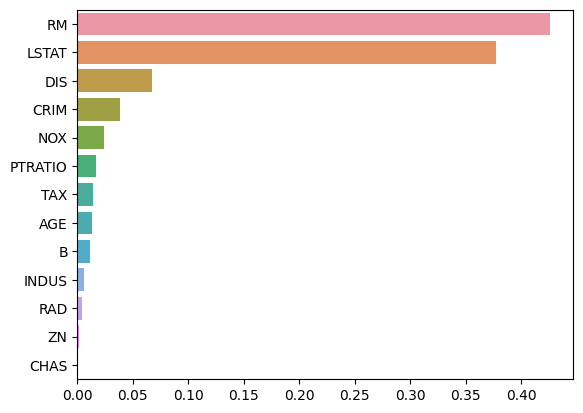

In [48]:
import seaborn as sns
%matplotlib inline

rf_reg = RandomForestRegressor(n_estimators=1000)

# 앞 예제에서 만들어진 X_data, y_target 데이터 셋을 적용하여 학습합니다.   
rf_reg.fit(X_data, y_target)

feature_series = pd.Series(data=rf_reg.feature_importances_, index=X_data.columns )
feature_series = feature_series.sort_values(ascending=False)
sns.barplot(x= feature_series, y=feature_series.index)

(100, 2)


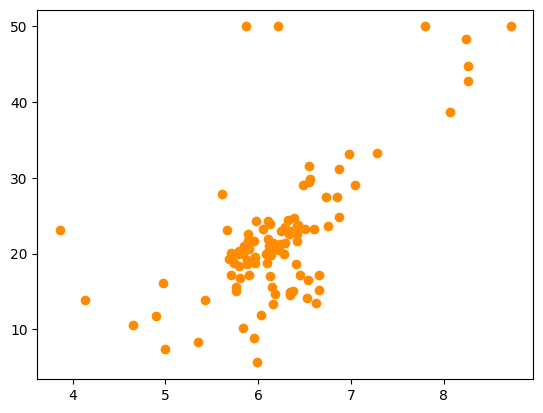

In [49]:
import matplotlib.pyplot as plt
%matplotlib inline

bostonDF_sample = bostonDF[['RM','PRICE']]
bostonDF_sample = bostonDF_sample.sample(n=100,random_state=0)
print(bostonDF_sample.shape)
plt.figure()
plt.scatter(bostonDF_sample.RM , bostonDF_sample.PRICE,c="darkorange")

In [50]:
import numpy as np
from sklearn.linear_model import LinearRegression

# 선형 회귀와 결정 트리 기반의 Regressor 생성. DecisionTreeRegressor의 max_depth는 각각 2, 7
lr_reg = LinearRegression()
rf_reg2 = DecisionTreeRegressor(max_depth=2)
rf_reg7 = DecisionTreeRegressor(max_depth=7)

# 실제 예측을 적용할 테스트용 데이터 셋을 4.5 ~ 8.5 까지 100개 데이터 셋 생성. 
X_test = np.arange(4.5, 8.5, 0.04).reshape(-1, 1)

# 보스턴 주택가격 데이터에서 시각화를 위해 피처는 RM만, 그리고 결정 데이터인 PRICE 추출
X_feature = bostonDF_sample['RM'].values.reshape(-1,1)
y_target = bostonDF_sample['PRICE'].values.reshape(-1,1)

# 학습과 예측 수행. 
lr_reg.fit(X_feature, y_target)
rf_reg2.fit(X_feature, y_target)
rf_reg7.fit(X_feature, y_target)

pred_lr = lr_reg.predict(X_test)
pred_rf2 = rf_reg2.predict(X_test)
pred_rf7 = rf_reg7.predict(X_test)


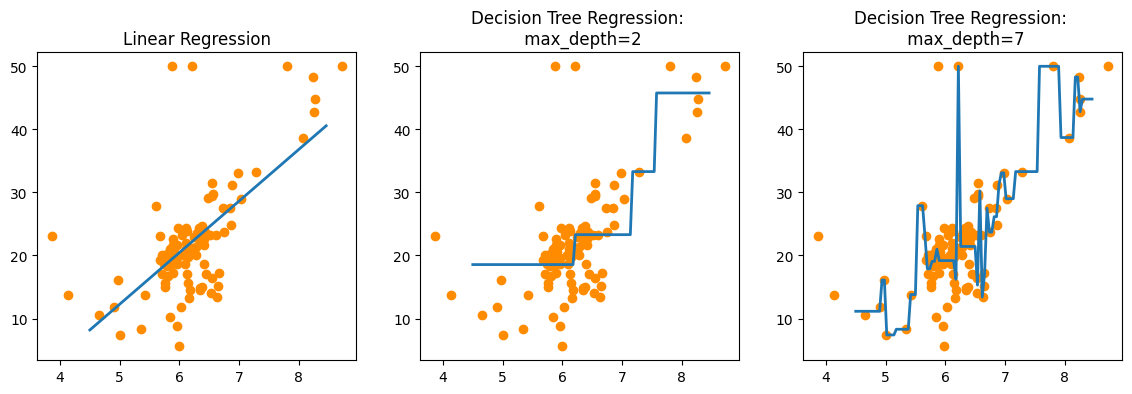

In [51]:

fig , (ax1, ax2, ax3) = plt.subplots(figsize=(14,4), ncols=3)

# X축값을 4.5 ~ 8.5로 변환하며 입력했을 때, 선형 회귀와 결정 트리 회귀 예측 선 시각화
# 선형 회귀로 학습된 모델 회귀 예측선 
ax1.set_title('Linear Regression')
ax1.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c="darkorange")
ax1.plot(X_test, pred_lr,label="linear", linewidth=2 )

# DecisionTreeRegressor의 max_depth를 2로 했을 때 회귀 예측선 
ax2.set_title('Decision Tree Regression: \n max_depth=2')
ax2.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c="darkorange")
ax2.plot(X_test, pred_rf2, label="max_depth:3", linewidth=2 )

# DecisionTreeRegressor의 max_depth를 7로 했을 때 회귀 예측선 
ax3.set_title('Decision Tree Regression: \n max_depth=7')
ax3.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c="darkorange")
ax3.plot(X_test, pred_rf7, label="max_depth:7", linewidth=2)

---

### **09. 회귀 실습 - 자전거 대여 수요 예측**


**파라미터**

- datetime : hourly date + timestamp
- season : 1 = 봄, 2 = 여름 , 3 = 가을, 4 = 겨울
- holiday : 1 = 토,일,주말제외 휴일, 0 = 휴일이 아닌 날
- workingday : 1 = 주말 및 휴일이 아닌 주중, 0 = 주말 및 휴일
- weather : 
    - 1 = 맑음, 약간 구름 낀 흐림
    - 2 = 안개, 안개 + 흐림
    - 3 = 가벼운 눈, 가벼운 비 + 천둥
    - 4 = 심한 눈/비, 천둥/번개 
- temp : 온도(섭씨)
- atemp: 체감온도(섭씨)
- humidity : 상대습도
- windspeed :풍속
- count :  대여 횟수

#### O 데이터 클렌징 및 가공과 데이터 시각화

In [52]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

bike_df = pd.read_csv('../data/bike_sharing/train.csv')
print(bike_df.shape)
bike_df.head(3)

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32


In [53]:
# 문자열로 되어있는 datetime 컬럼은 datetime object 변환

bike_df['datetime']=bike_df['datetime'].apply(pd.to_datetime)
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [54]:
# datetime 컬럼에서 연도,월,일 시간,추출 => 새로운 컬럼 생성에 대입

# bike_df['datetime'][0].year, bike_df['datetime'][0].month,bike_df['datetime'][0].day,bike_df['datetime'][0].hour
#(2011, 1, 1, 0)

bike_df['year'] = bike_df['datetime'].apply(lambda x: x.year)
bike_df['month'] = bike_df['datetime'].apply(lambda x: x.month)
bike_df['day'] = bike_df['datetime'].apply(lambda x: x.day)
bike_df['hour'] = bike_df['datetime'].apply(lambda x: x.hour)

bike_df.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2


In [55]:
bike_df.loc[(bike_df['year']==2011) & (bike_df['month']==1),:]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426,2011-01-19 19:00:00,1,0,1,1,13.12,14.395,57,27.9993,4,108,112,2011,1,19,19
427,2011-01-19 20:00:00,1,0,1,1,13.12,15.150,49,19.9995,2,74,76,2011,1,19,20
428,2011-01-19 21:00:00,1,0,1,1,13.12,14.395,49,27.9993,4,55,59,2011,1,19,21
429,2011-01-19 22:00:00,1,0,1,1,12.30,15.150,52,11.0014,6,53,59,2011,1,19,22


In [56]:
# 필요없는 컬럼 삭제

drop_columns =['datetime','casual','registered']
bike_df.drop(drop_columns, axis=1, inplace=True)

In [57]:
bike_df.head(3)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour
0,1,0,0,1,9.84,14.395,81,0.0,16,2011,1,1,0
1,1,0,0,1,9.02,13.635,80,0.0,40,2011,1,1,1
2,1,0,0,1,9.02,13.635,80,0.0,32,2011,1,1,2


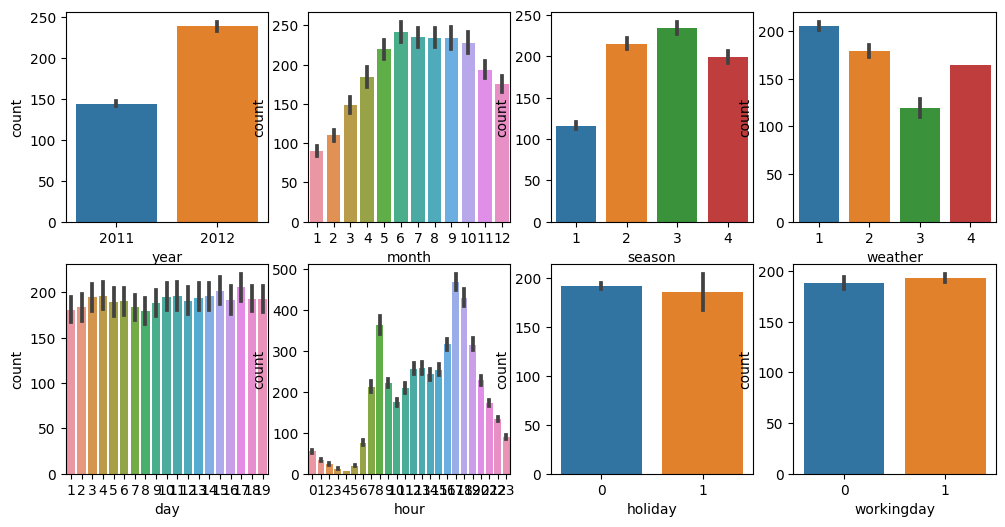

In [58]:
# 데이터 분포 확인

fig, axs = plt.subplots(figsize=(12, 6), ncols=4, nrows=2)
cat_features = ['year', 'month','season','weather','day', 'hour', 'holiday','workingday']
# cat_features에 있는 모든 칼럼별로 개별 칼럼값에 따른 count의 합을 barplot으로 시각화
for i, feature in enumerate(cat_features):
    row = int(i/4)
    col = i%4
    # 시본의 barplot을 이용해 칼럼값에 따른 count의 합을 표현
    sns.barplot(x=feature, y='count', data=bike_df, ax=axs[row][col])


#### O 로그 변환, 피처 인코딩과 모델 학습/예측/평가

In [59]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# log 값 변환 시 NaN등의 이슈로 log() 가 아닌 log1p() 를 이용하여 RMSLE 계산
def rmsle(y, pred):
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)
    squared_error = (log_y - log_pred) ** 2
    rmsle = np.sqrt(np.mean(squared_error))
    return rmsle

# 사이킷런의 mean_square_error() 를 이용하여 RMSE 계산
def rmse(y,pred):
    return np.sqrt(mean_squared_error(y,pred))

# MSE, RMSE, RMSLE 를 모두 계산 
def evaluate_regr(y,pred):
    rmsle_val = rmsle(y,pred)
    rmse_val = rmse(y,pred)
    # MAE 는 scikit learn의 mean_absolute_error() 로 계산
    mae_val = mean_absolute_error(y,pred)
    print('RMSLE: {0:.3f}, RMSE: {1:.3F}, MAE: {2:.3F}'.format(rmsle_val, rmse_val, mae_val))

In [60]:
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.linear_model import LinearRegression , Ridge , Lasso

y_target = bike_df['count']
X_features = bike_df.drop(['count'],axis=1,inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.3, random_state=0)

lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)

evaluate_regr(y_test ,pred)

RMSLE: 1.165, RMSE: 140.900, MAE: 105.924


In [61]:
def get_top_error_data(y_test, pred, n_tops = 5):
    # DataFrame에 컬럼들로 실제 대여횟수(count)와 예측 값을 서로 비교 할 수 있도록 생성. 
    result_df = pd.DataFrame(y_test.values, columns=['real_count'])
    result_df['predicted_count']= np.round(pred)
    result_df['diff'] = np.abs(result_df['real_count'] - result_df['predicted_count'])
    # 예측값과 실제값이 가장 큰 데이터 순으로 출력. 
    print(result_df.sort_values('diff', ascending=False)[:n_tops])
    
get_top_error_data(y_test,pred,n_tops=5)

      real_count  predicted_count   diff
1618         890            322.0  568.0
3151         798            241.0  557.0
966          884            327.0  557.0
412          745            194.0  551.0
2817         856            310.0  546.0


<Axes: >

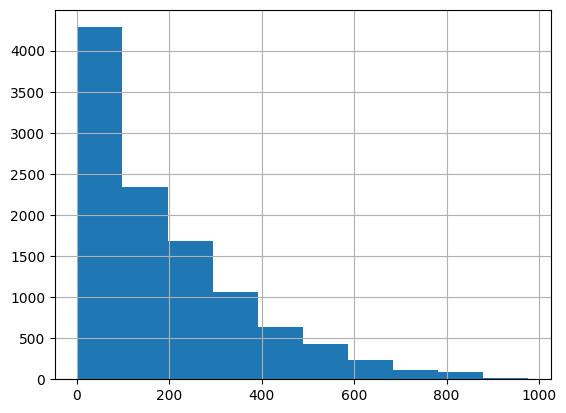

In [62]:
y_target.hist()

<Axes: >

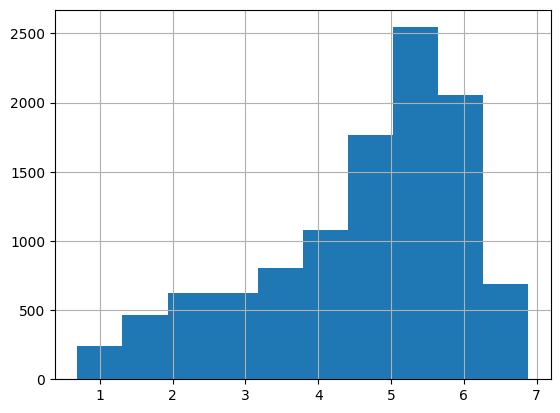

In [63]:
y_log_transform = np.log1p(y_target)
y_log_transform.hist()

In [64]:
# 타깃 칼럼인 count 값을 log1p로 로그 변환
y_target_log = np.log1p(y_target)

# 로그 변환된 y_target_log를 반영하여 학습/테스트 데이터 셋 분할
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target_log, test_size=0.3, random_state=0)
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)

# 테스트 데이터 셋의 Target 값은 Log 변환되었으므로 다시 expm1를 이용하여 원래 scale로 변환
y_test_exp = np.expm1(y_test)

# 예측 값 역시 Log 변환된 타깃 기반으로 학습되어 예측되었으므로 다시 exmpl으로 scale변환
pred_exp = np.expm1(pred)

evaluate_regr(y_test_exp ,pred_exp)


RMSLE: 1.017, RMSE: 162.594, MAE: 109.286


<Axes: >

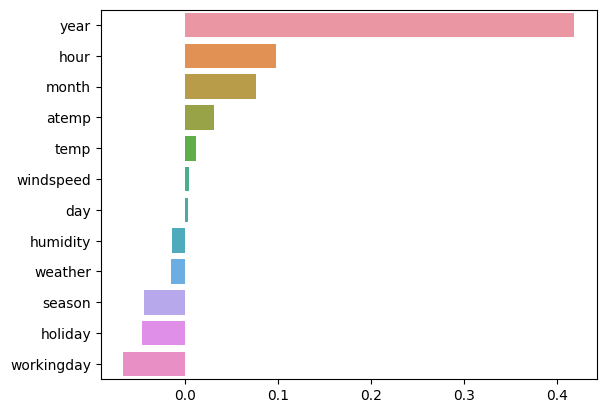

In [65]:
# 계수값을 시각화

coef = pd.Series(lr_reg.coef_, index=X_features.columns)
coef_sort = coef.sort_values(ascending=False)
sns.barplot(x=coef_sort.values, y=coef_sort.index)


In [66]:
# 'year', month', 'day', hour'등의 피처들을 One Hot Encoding
X_features_ohe = pd.get_dummies(X_features, columns=['year', 'month','day', 'hour', 'holiday',
                                              'workingday','season','weather'])


In [67]:
X_features.shape

(10886, 12)

In [68]:
X_features_ohe.shape

(10886, 73)

In [69]:
X_features_ohe.head(3)

,temp,atemp,humidity,windspeed,year_2011,year_2012,month_1,month_2,month_3,month_4,...,workingday_0,workingday_1,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,9.84,14.395,81,0.0,True,False,True,False,False,False,...,True,False,True,False,False,False,True,False,False,False
1,9.02,13.635,80,0.0,True,False,True,False,False,False,...,True,False,True,False,False,False,True,False,False,False
2,9.02,13.635,80,0.0,True,False,True,False,False,False,...,True,False,True,False,False,False,True,False,False,False


In [70]:
# 원-핫 인코딩이 적용된 feature 데이터 세트 기반으로 학습/예측 데이터 분할. 
X_train, X_test, y_train, y_test = train_test_split(X_features_ohe, y_target_log,
                                                    test_size=0.3, random_state=0)

# 모델과 학습/테스트 데이터 셋을 입력하면 성능 평가 수치를 반환
def get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1=False):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    if is_expm1 :
        y_test = np.expm1(y_test)
        pred = np.expm1(pred)
    print('###',model.__class__.__name__,'###')
    evaluate_regr(y_test, pred)
# end of function get_model_predict    

# model 별로 평가 수행
lr_reg = LinearRegression()
ridge_reg = Ridge(alpha=10)
lasso_reg = Lasso(alpha=0.01)

for model in [lr_reg, ridge_reg, lasso_reg]:
    get_model_predict(model,X_train, X_test, y_train, y_test,is_expm1=True)

### LinearRegression ###
RMSLE: 0.590, RMSE: 97.686, MAE: 63.382
### Ridge ###
RMSLE: 0.590, RMSE: 98.529, MAE: 63.893
### Lasso ###
RMSLE: 0.635, RMSE: 113.219, MAE: 72.803


<Axes: >

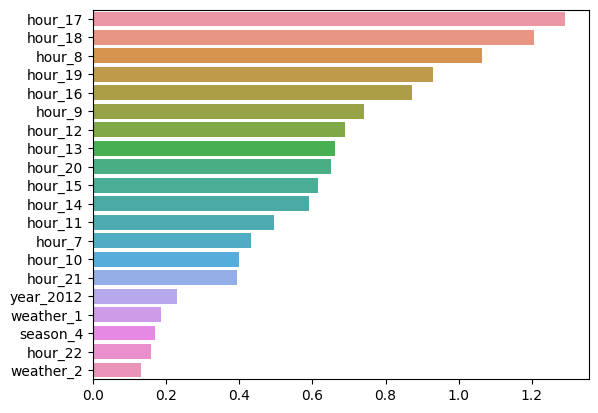

In [71]:
coef = pd.Series(ridge_reg.coef_ , index=X_features_ohe.columns)
coef_sort = coef.sort_values(ascending=False)[:20]
sns.barplot(x=coef_sort.values , y=coef_sort.index)

---

# **20230601**

### **10. 회귀 실습 - 캐글 주택 가격: 고급 회귀 기법**

#### O 데이터 사전 처리(Preprocessing)

In [72]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

house_df_org = pd.read_csv('../data/house_prices/train.csv')
house_df = house_df_org.copy()
house_df.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [73]:
print('데이터 세트의 Shape:', house_df.shape)
print('\n전체 feature 들의 type \n',house_df.dtypes.value_counts())
isnull_series = house_df.isnull().sum()
print('\nNull 컬럼과 그 건수:\n ', isnull_series[isnull_series > 0].sort_values(ascending=False))

데이터 세트의 Shape: (1460, 81)

전체 feature 들의 type 
 object     43
int64      35
float64     3
Name: count, dtype: int64

Null 컬럼과 그 건수:
  PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
Electrical         1
dtype: int64


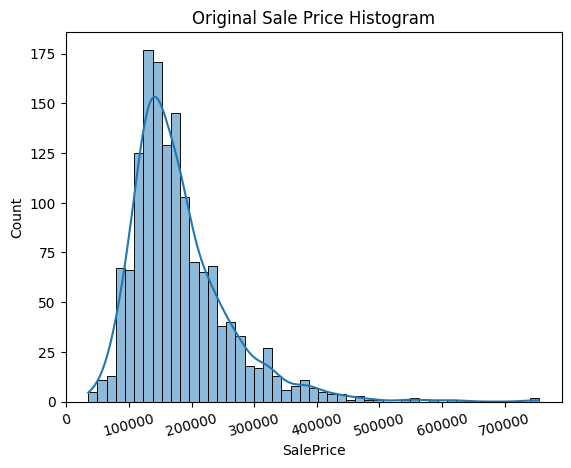

In [74]:
# SalePrice(원래 답) 히스토그램
plt.title('Original Sale Price Histogram')
plt.xticks(rotation=15)
sns.histplot(house_df['SalePrice'], kde=True)
plt.show()

In [75]:
# SalePrice 로그 변환
original_SalePrice = house_df['SalePrice']
house_df['SalePrice'] = np.log1p(house_df['SalePrice'])

# Null 이 너무 많은 컬럼들과 불필요한 컬럼 삭제
house_df.drop(['Id','PoolQC' , 'MiscFeature', 'Alley', 'Fence','FireplaceQu'], axis=1 , inplace=True)


In [76]:
# 'LotFrontage', 'MasVnrArea', 'GarageYrBlt'
house_df['LotFrontage'].fillna(house_df['LotFrontage'].mean(),inplace=True)
house_df['MasVnrArea'].fillna(house_df['MasVnrArea'].mean(),inplace=True)
house_df['GarageYrBlt'].fillna(house_df['GarageYrBlt'].mean(),inplace=True)


In [77]:
# Drop 하지 않는 숫자형 Null컬럼들은 평균값으로 대체
# house_df.fillna(house_df.mean(),inplace=True)

# Null 값이 있는 피처명과 타입을 추출
null_column_count = house_df.isnull().sum()[house_df.isnull().sum() > 0]
print('## Null 피처의 Type :\n', house_df.dtypes[null_column_count.index])

## Null 피처의 Type :
 MasVnrType      object
BsmtQual        object
BsmtCond        object
BsmtExposure    object
BsmtFinType1    object
BsmtFinType2    object
Electrical      object
GarageType      object
GarageFinish    object
GarageQual      object
GarageCond      object
dtype: object


In [78]:
print('get_dummies() 수행 전 데이터 Shape:', house_df.shape)
house_df_ohe = pd.get_dummies(house_df)
print('get_dummies() 수행 후 데이터 Shape:', house_df_ohe.shape)

null_column_count = house_df_ohe.isnull().sum()[house_df_ohe.isnull().sum() > 0]
print('## Null 피처의 Type :\n', house_df_ohe.dtypes[null_column_count.index])

get_dummies() 수행 전 데이터 Shape: (1460, 75)
get_dummies() 수행 후 데이터 Shape: (1460, 270)
## Null 피처의 Type :
 Series([], dtype: object)


#### O 선형 회귀 모델 학습/예측/평가

- Linear Regression, Lasso, Ridge

In [79]:
# model = fit된 것

def get_rmse(model):
    pred = model.predict(X_test)
    mse = mean_squared_error(y_test , pred)
    rmse = np.sqrt(mse)
    print('{0} 로그 변환된 RMSE: {1}'.format(model.__class__.__name__,np.round(rmse, 3)))
    return rmse

def get_rmses(models):
    rmses = [ ]
    for model in models:
        rmse = get_rmse(model)
        rmses.append(rmse)
    return rmses


In [80]:
# 데이터 / 답 분리

y_target = house_df_ohe['SalePrice'] # 주택가격
# inplace=False => 삭제한 후 데이터프레임 리턴
X_features = house_df_ohe.drop('SalePrice',axis=1, inplace=False)

# 학습 / 테스트 분리

X_train, X_test, y_train, y_test = train_test_split(X_features
                                                    , y_target
                                                    , test_size=0.2
                                                    , random_state=156)


In [81]:
# LinearRegression, Ridge, Lasso 학습, 예측, 평가
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)


ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)


lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)


models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

LinearRegression 로그 변환된 RMSE: 0.132
Ridge 로그 변환된 RMSE: 0.127
Lasso 로그 변환된 RMSE: 0.176


[0.13183184688250532, 0.1274058283626617, 0.17628250556471398]

In [82]:
def get_top_bottom_coef(model):
    # coef_ 속성을 기반으로 Series 객체를 생성. index는 컬럼명.
    coef = pd.Series(model.coef_, index=X_features.columns)
   
    # + 상위 10개 , - 하위 10개 coefficient 추출하여 반환.
    coef_high = coef.sort_values(ascending=False).head(10)
    coef_low = coef.sort_values(ascending=False).tail(10)
    return coef_high, coef_low


##### ㅇ 회귀모델 시각화 함수

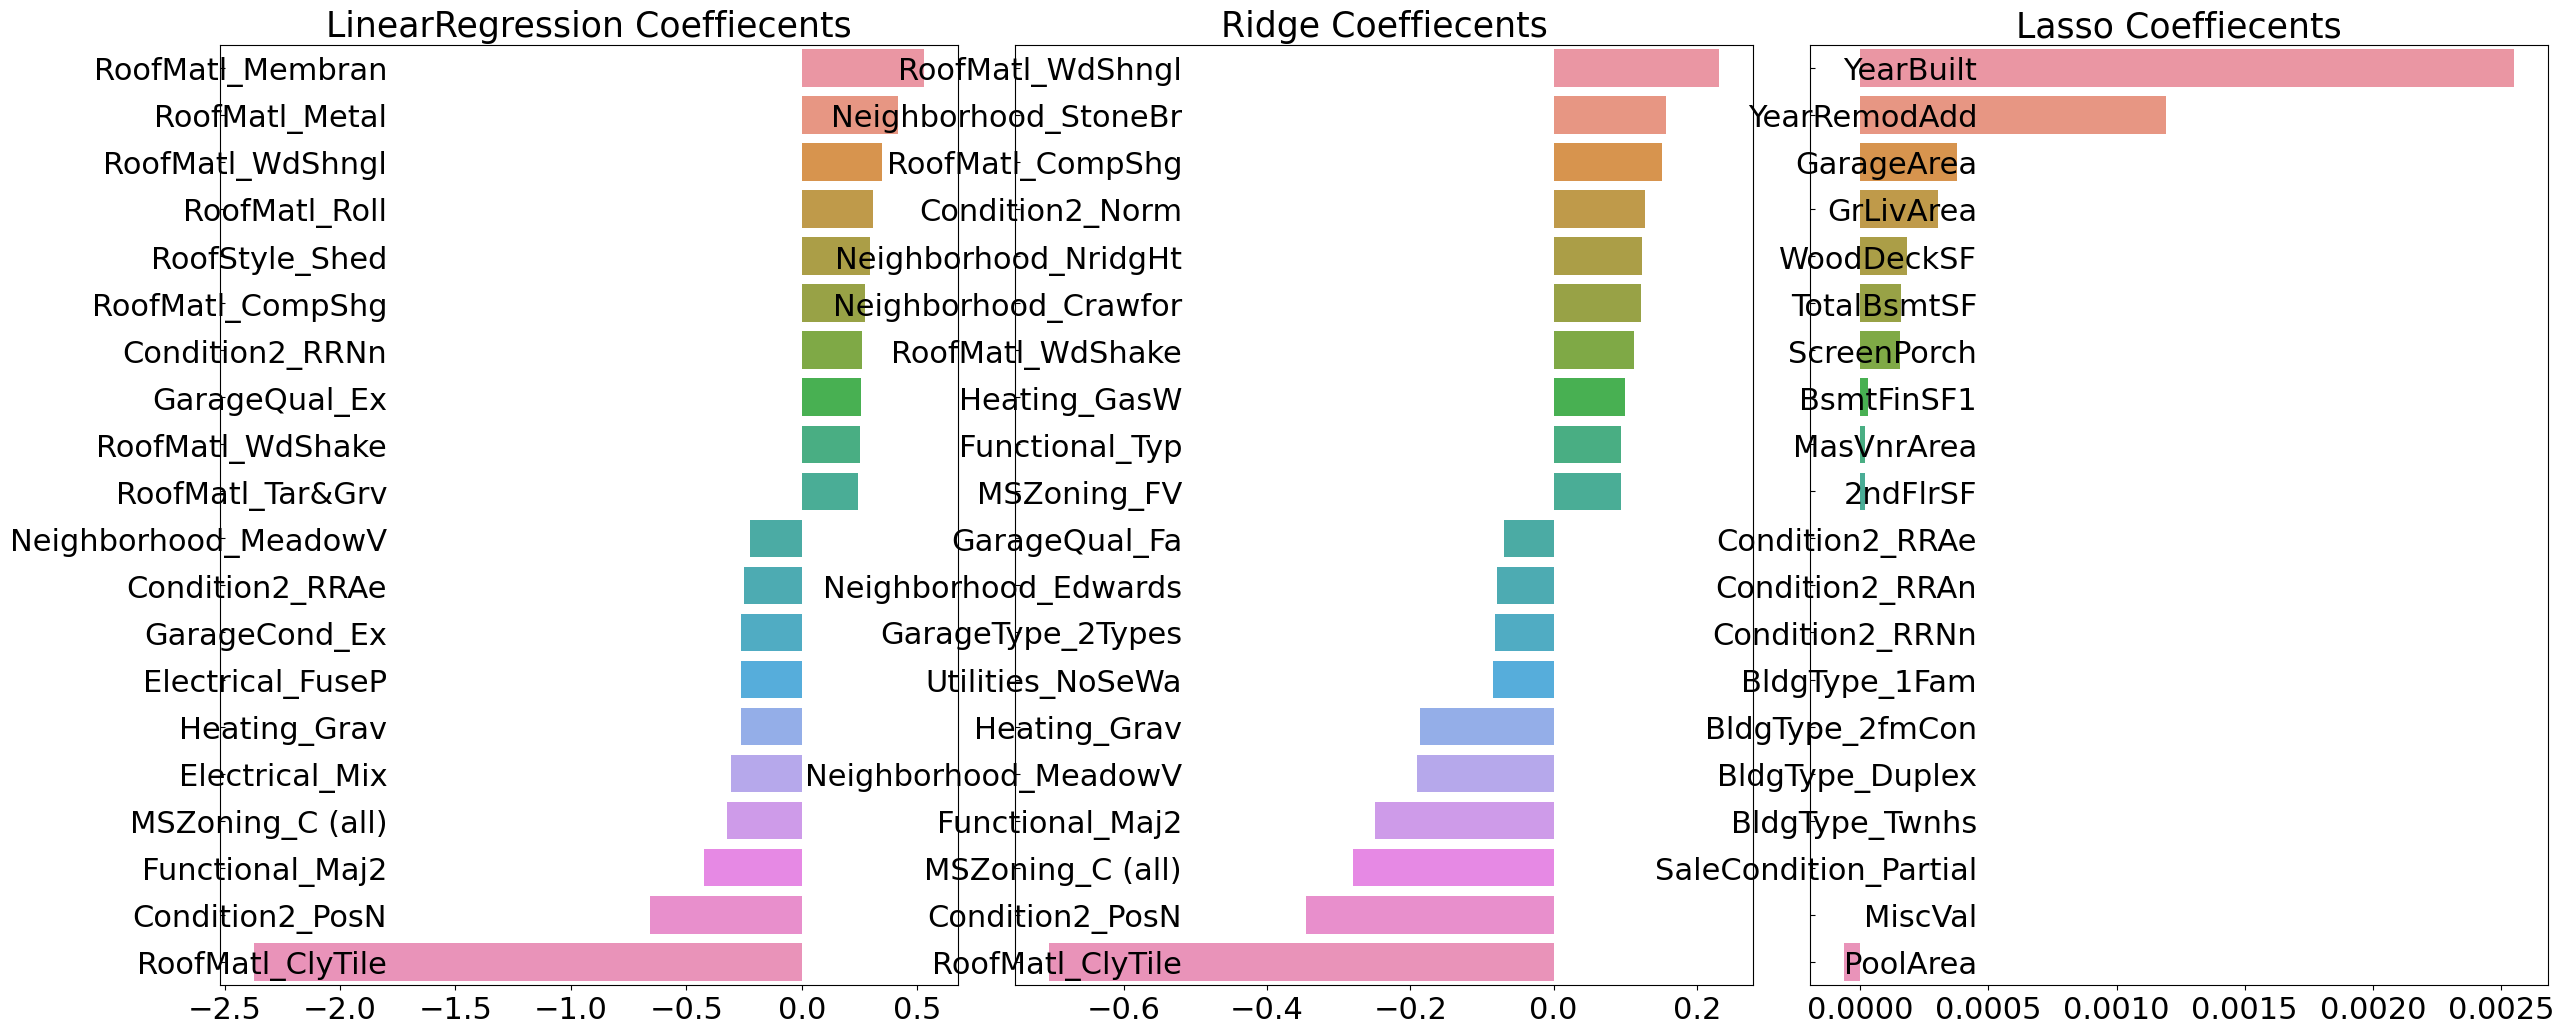

In [83]:
def visualize_coefficient(models):
    # 3개 회귀 모델의 시각화를 위해 3개의 컬럼을 가지는 subplot 생성
    fig, axs = plt.subplots(figsize=(24,10),nrows=1, ncols=3)
    fig.tight_layout()
    # 입력인자로 받은 list객체인 models에서 차례로 model을 추출하여 회귀 계수 시각화.
    for i_num, model in enumerate(models):
        # 상위 10개, 하위 10개 회귀 계수를 구하고, 이를 판다스 concat으로 결합.
        coef_high, coef_low = get_top_bottom_coef(model)
        coef_concat = pd.concat( [coef_high , coef_low] )
        # 순차적으로 ax subplot에 barchar로 표현. 한 화면에 표현하기 위해 tick label 위치와 font 크기 조정.
        axs[i_num].set_title(model.__class__.__name__+' Coeffiecents', size=25)
        axs[i_num].tick_params(axis="y",direction="in", pad=-120)
        for label in (axs[i_num].get_xticklabels() + axs[i_num].get_yticklabels()):
            label.set_fontsize(22)
        sns.barplot(x=coef_concat.values, y=coef_concat.index , ax=axs[i_num])


# 앞 예제에서 학습한 lr_reg, ridge_reg, lasso_reg 모델의 회귀 계수 시각화.    
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

In [84]:
from sklearn.model_selection import cross_val_score


def get_avg_rmse_cv(models):
    for model in models:
        # 분할하지 않고 전체 데이터로 cross_val_score( ) 수행. 모델별 CV RMSE값과 평균 RMSE 출력
        rmse_list = np.sqrt(-cross_val_score(model, X_features, y_target,
                                             scoring="neg_mean_squared_error", cv = 5))
        rmse_avg = np.mean(rmse_list)
        print('\n{0} CV RMSE 값 리스트: {1}'.format( model.__class__.__name__, np.round(rmse_list, 3)))
        print('{0} CV 평균 RMSE 값: {1}'.format( model.__class__.__name__, np.round(rmse_avg, 3)))


# 앞 예제에서 학습한 lr_reg, ridge_reg, lasso_reg 모델의 CV RMSE값 출력          
models = [lr_reg, ridge_reg, lasso_reg]
get_avg_rmse_cv(models)


LinearRegression CV RMSE 값 리스트: [0.135 0.165 0.167 0.111 0.198]
LinearRegression CV 평균 RMSE 값: 0.155

Ridge CV RMSE 값 리스트: [0.117 0.154 0.142 0.117 0.189]
Ridge CV 평균 RMSE 값: 0.144

Lasso CV RMSE 값 리스트: [0.161 0.204 0.177 0.181 0.265]
Lasso CV 평균 RMSE 값: 0.198


In [85]:

from sklearn.model_selection import GridSearchCV


def print_best_params(model, params):
    grid_model = GridSearchCV(model, param_grid=params,
                              scoring='neg_mean_squared_error', cv=5)
    grid_model.fit(X_features, y_target)
    rmse = np.sqrt(-1* grid_model.best_score_)
    print('{0} 5 CV 시 최적 평균 RMSE 값: {1}, 최적 alpha:{2}'.format(model.__class__.__name__,
                                        np.round(rmse, 4), grid_model.best_params_))
    return grid_model.best_estimator_


ridge_params = { 'alpha':[0.05, 0.1, 1, 5, 8, 10, 12, 15, 20] }
lasso_params = { 'alpha':[0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1,5, 10] }
best_rige = print_best_params(ridge_reg, ridge_params)
best_lasso = print_best_params(lasso_reg, lasso_params)

Ridge 5 CV 시 최적 평균 RMSE 값: 0.1418, 최적 alpha:{'alpha': 12}
Lasso 5 CV 시 최적 평균 RMSE 값: 0.142, 최적 alpha:{'alpha': 0.001}


LinearRegression 로그 변환된 RMSE: 0.132
Ridge 로그 변환된 RMSE: 0.124
Lasso 로그 변환된 RMSE: 0.12


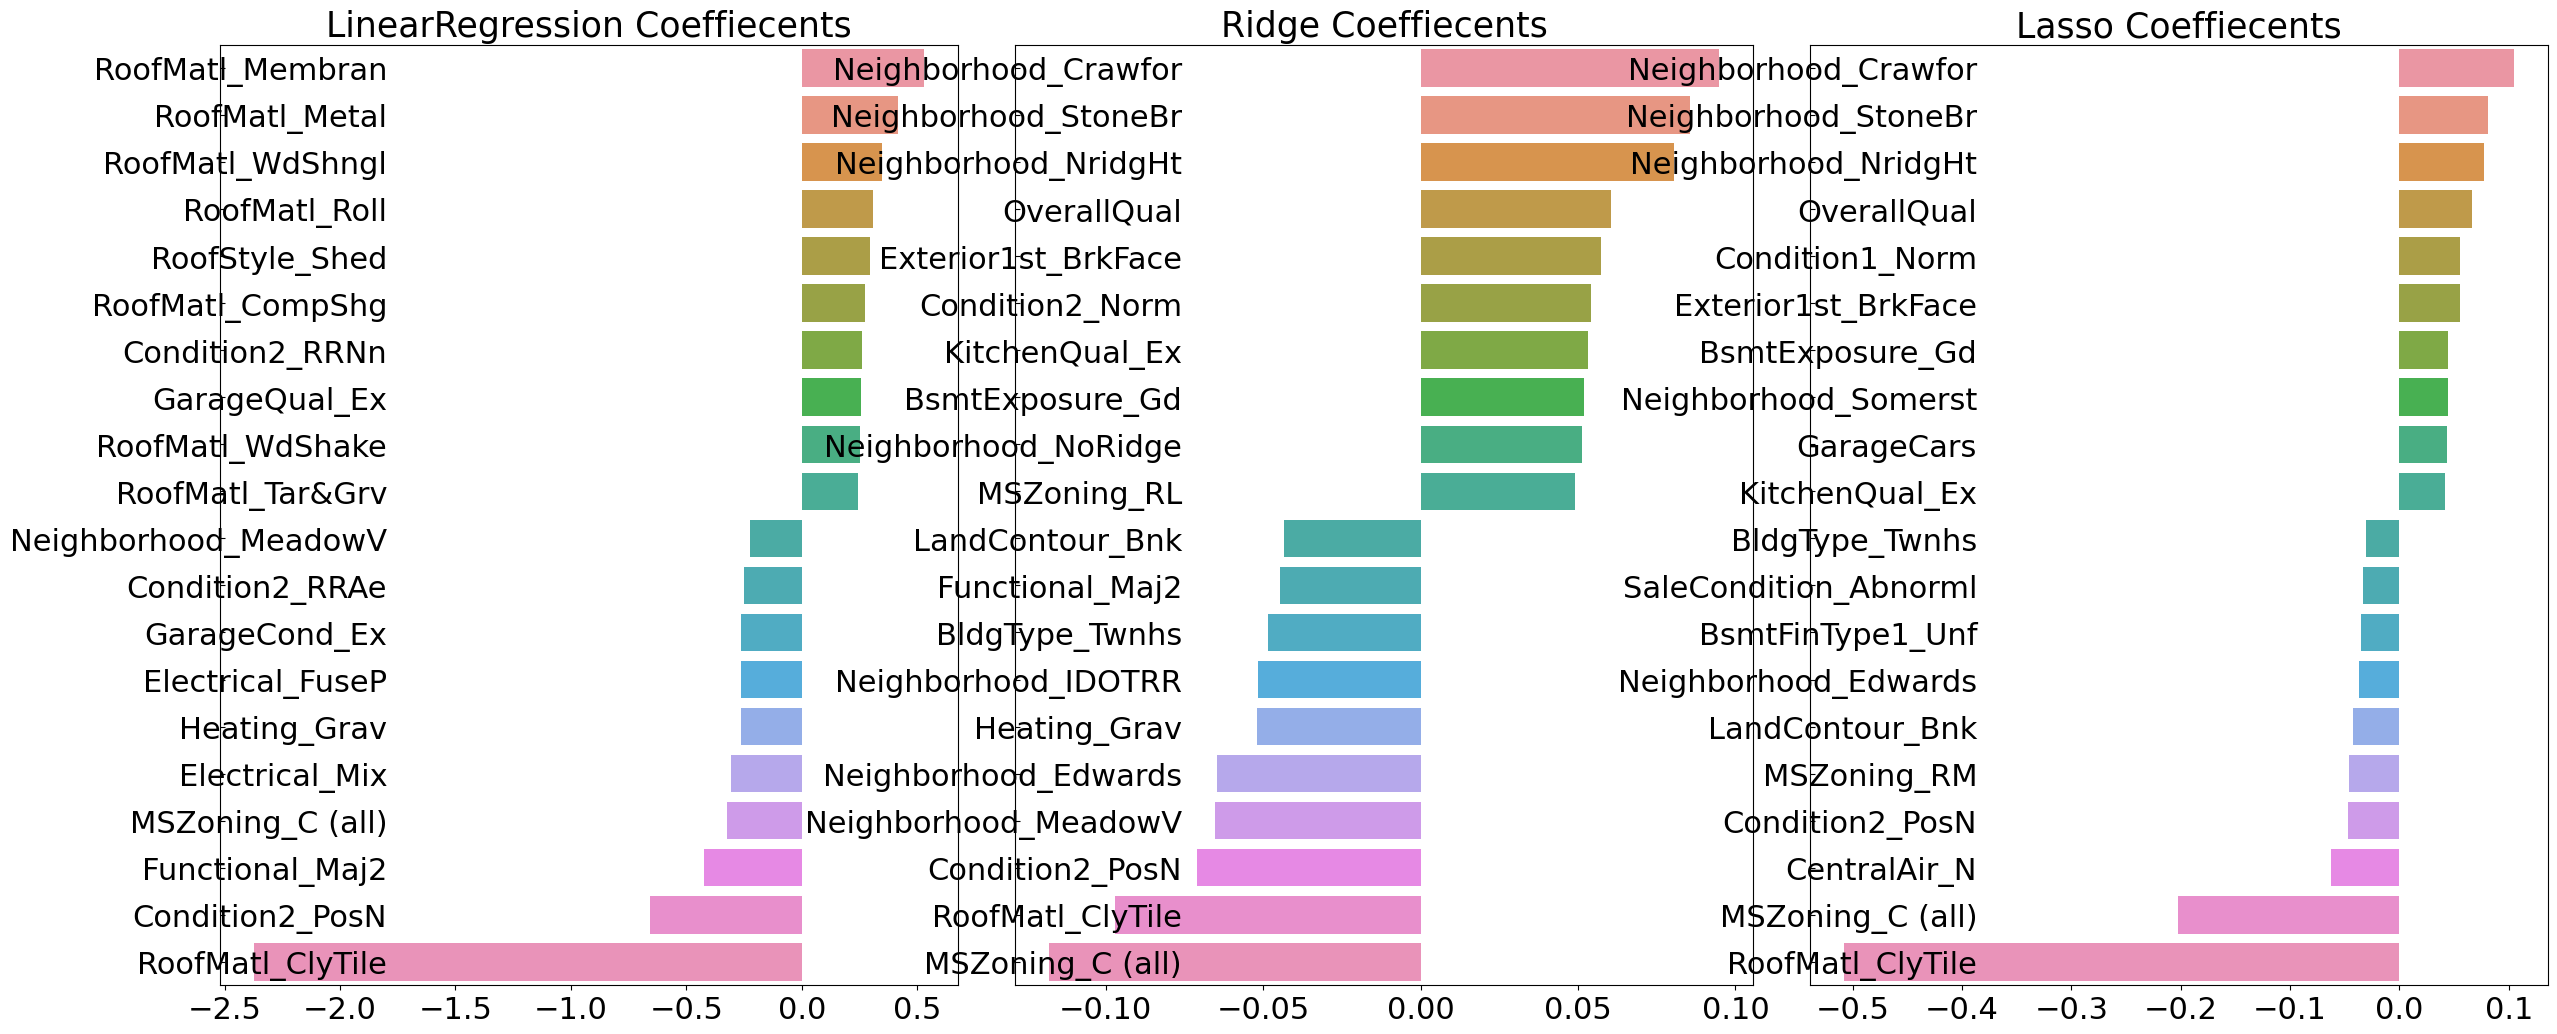

In [86]:
# 앞의 최적화 alpha값으로 학습데이터로 학습, 테스트 데이터로 예측 및 평가 수행.
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
ridge_reg = Ridge(alpha=12)
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)


# 모든 모델의 RMSE 출력
models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)


# 모든 모델의 회귀 계수 시각화
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

In [88]:
from scipy.stats import skew

In [89]:
# object가 아닌 숫자형 피처의 칼럼 index 객체 추출.
features_index = house_df.dtypes[house_df.dtypes != 'object'].index
# house_df에 칼럼 index를 [ ]로 입력하면 해당하는 칼럼 데이터 세트 반환. apply lambda로 skew( ) 호출
skew_features = house_df[features_index].apply(lambda x : skew(x))
# skew(왜곡) 정도가 1 이상인 칼럼만 추출.
skew_features_top = skew_features[skew_features > 1]
print(skew_features_top.sort_values(ascending=False))

MiscVal          24.451640
PoolArea         14.813135
LotArea          12.195142
3SsnPorch        10.293752
LowQualFinSF      9.002080
KitchenAbvGr      4.483784
BsmtFinSF2        4.250888
ScreenPorch       4.117977
BsmtHalfBath      4.099186
EnclosedPorch     3.086696
MasVnrArea        2.673661
LotFrontage       2.382499
OpenPorchSF       2.361912
BsmtFinSF1        1.683771
WoodDeckSF        1.539792
TotalBsmtSF       1.522688
MSSubClass        1.406210
1stFlrSF          1.375342
GrLivArea         1.365156
dtype: float64


In [90]:
house_df[skew_features_top.index] = np.log1p(house_df[skew_features_top.index])

In [91]:

# Skew가 높은 피처들을 로그 변환 했으므로 다시 원-핫 인코딩 적용 및 피처/타겟 데이터 셋 생성,
house_df_ohe = pd.get_dummies(house_df)
y_target = house_df_ohe['SalePrice']
X_features = house_df_ohe.drop('SalePrice',axis=1, inplace=False)
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=156)


# 피처들을 로그 변환 후 다시 최적 하이퍼 파라미터와 RMSE 출력
ridge_params = { 'alpha':[0.05, 0.1, 1, 5, 8, 10, 12, 15, 20] }
lasso_params = { 'alpha':[0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1,5, 10] }
best_ridge = print_best_params(ridge_reg, ridge_params)
best_lasso = print_best_params(lasso_reg, lasso_params)


Ridge 5 CV 시 최적 평균 RMSE 값: 0.1275, 최적 alpha:{'alpha': 10}
Lasso 5 CV 시 최적 평균 RMSE 값: 0.1252, 최적 alpha:{'alpha': 0.001}


LinearRegression 로그 변환된 RMSE: 0.128
Ridge 로그 변환된 RMSE: 0.122
Lasso 로그 변환된 RMSE: 0.119


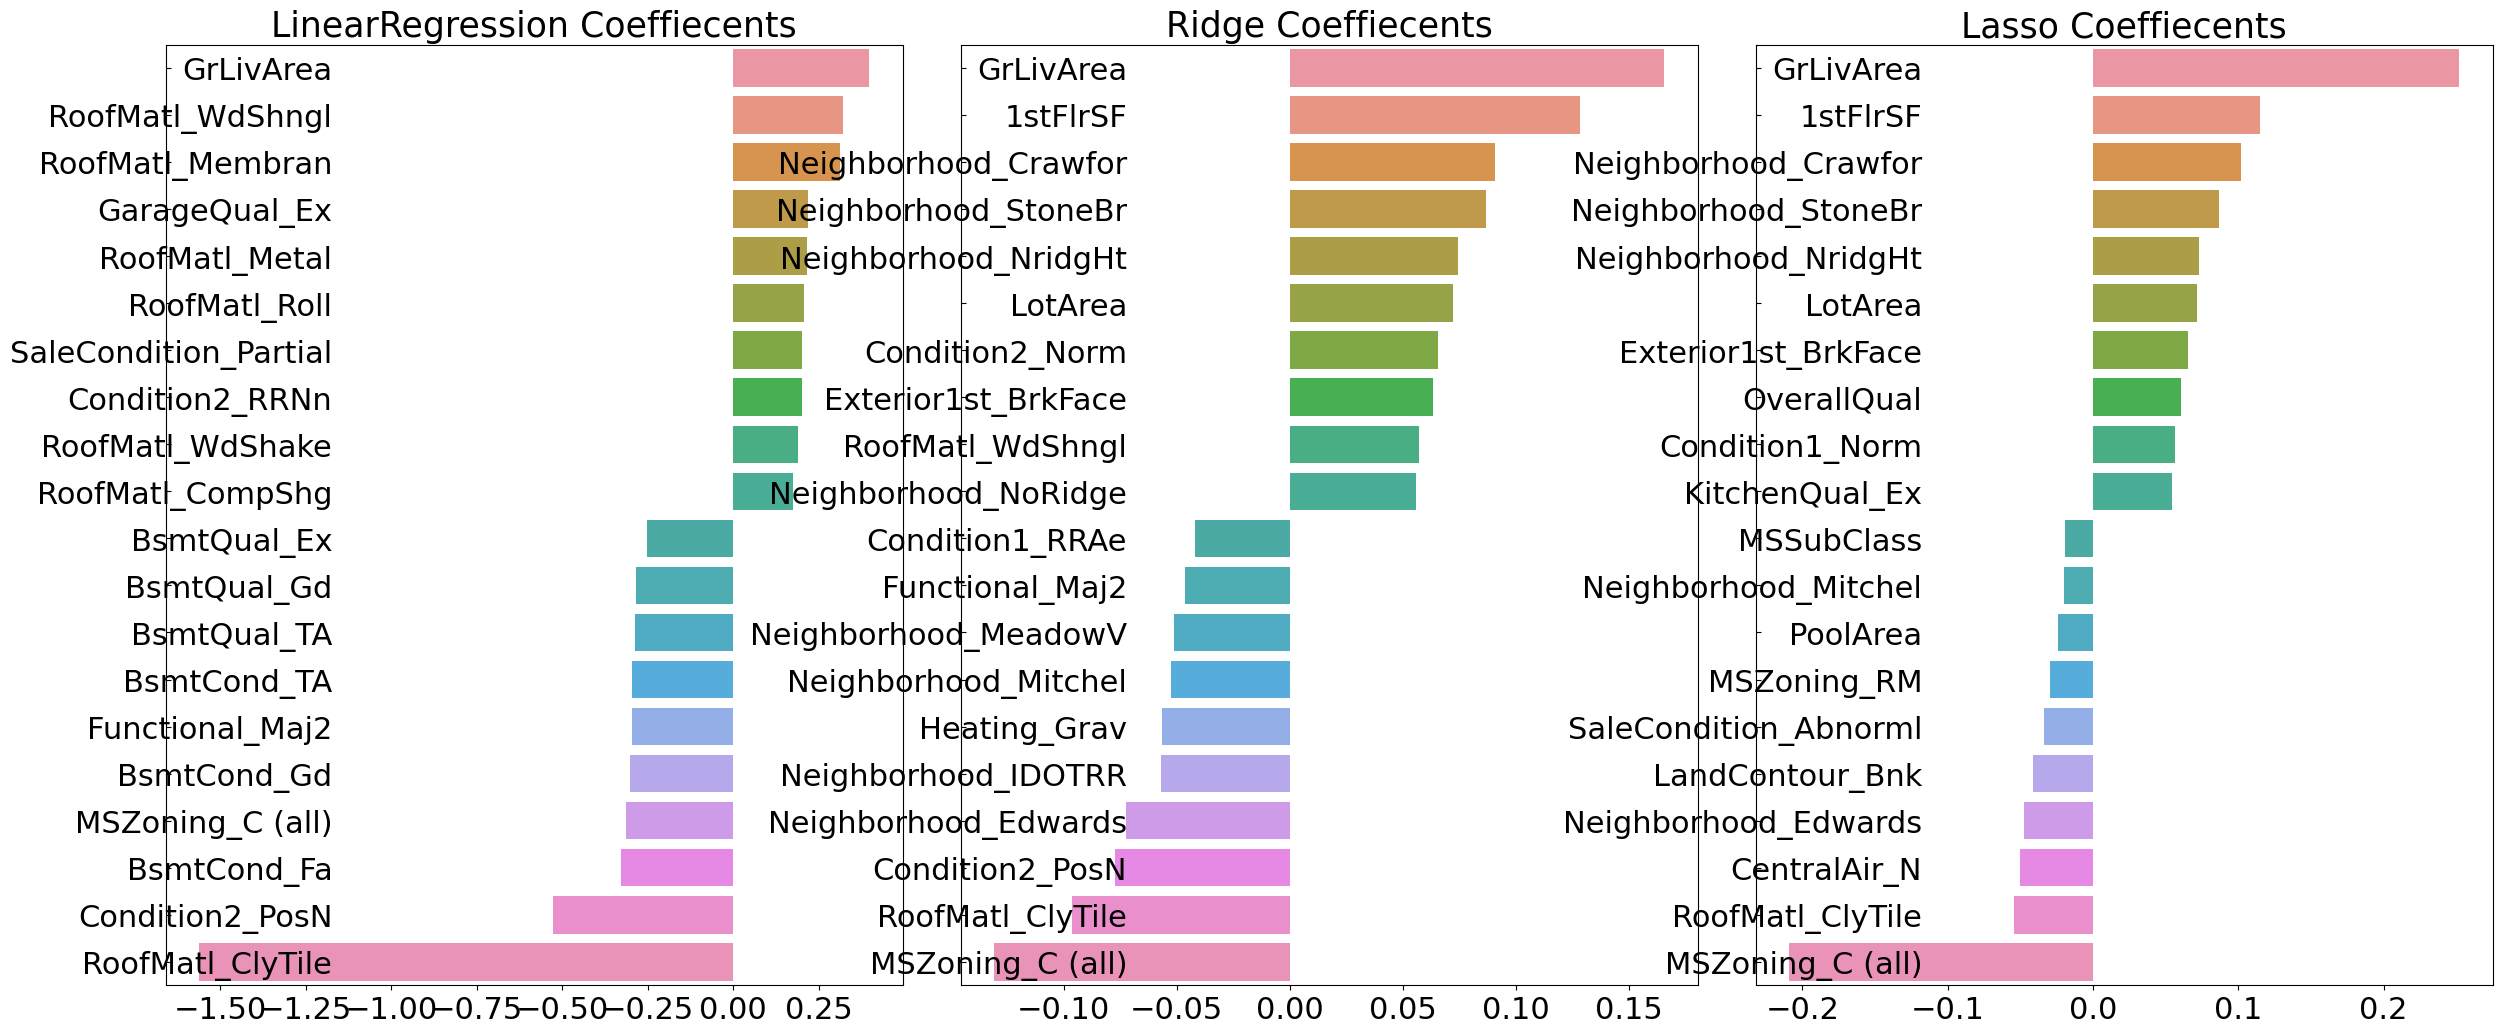

In [92]:
# 앞의 최적화 alpha값으로 학습데이터로 학습, 테스트 데이터로 예측 및 평가 수행.
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
ridge_reg = Ridge(alpha=10)
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)


# 모든 모델의 RMSE 출력
models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models) # test data 오차


# 모든 모델의 회귀 계수 시각화
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

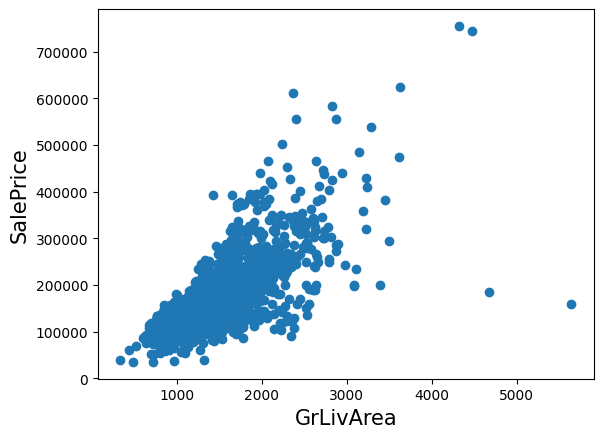

In [93]:
# 이상치 데이터 처리
# 회귀계수가 높은 피처, 즉 예측에 영향을 미치는 중요 피처의 이상치 데이터의 처리가 중요

plt.scatter(x = house_df_org['GrLivArea'], y = house_df_org['SalePrice'])
plt.ylabel('SalePrice', fontsize=15)
plt.xlabel('GrLivArea', fontsize=15)
plt.show()


In [94]:
# GrLivArea와 SalePrice 모두 로그 변환되었으므로 이를 반영한 조건 생성.
cond1 = house_df_ohe['GrLivArea'] > np.log1p(4000)
cond2 = house_df_ohe['SalePrice'] < np.log1p(500000)
outlier_index = house_df_ohe[cond1 & cond2].index


print('아웃라이어 레코드 index :', outlier_index.values)
print('아웃라이어 삭제 전 house_df_ohe shape:', house_df_ohe.shape)
# DataFrame의 index를 이용하여 아웃라이어 레코드 삭제.
house_df_ohe.drop(outlier_index , axis=0, inplace=True)
print('아웃라이어 삭제 후 house_df_ohe shape:', house_df_ohe.shape)

아웃라이어 레코드 index : [ 523 1298]
아웃라이어 삭제 전 house_df_ohe shape: (1460, 270)
아웃라이어 삭제 후 house_df_ohe shape: (1458, 270)


In [95]:
y_target = house_df_ohe['SalePrice']
X_features = house_df_ohe.drop('SalePrice',axis=1, inplace=False)
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=156)


ridge_params = { 'alpha':[0.05, 0.1, 1, 5, 8, 10, 12, 15, 20] }
lasso_params = { 'alpha':[0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1,5, 10] }
best_ridge = print_best_params(ridge_reg, ridge_params)
best_lasso = print_best_params(lasso_reg, lasso_params)

Ridge 5 CV 시 최적 평균 RMSE 값: 0.1125, 최적 alpha:{'alpha': 8}
Lasso 5 CV 시 최적 평균 RMSE 값: 0.1122, 최적 alpha:{'alpha': 0.001}


LinearRegression 로그 변환된 RMSE: 0.129
Ridge 로그 변환된 RMSE: 0.103
Lasso 로그 변환된 RMSE: 0.1


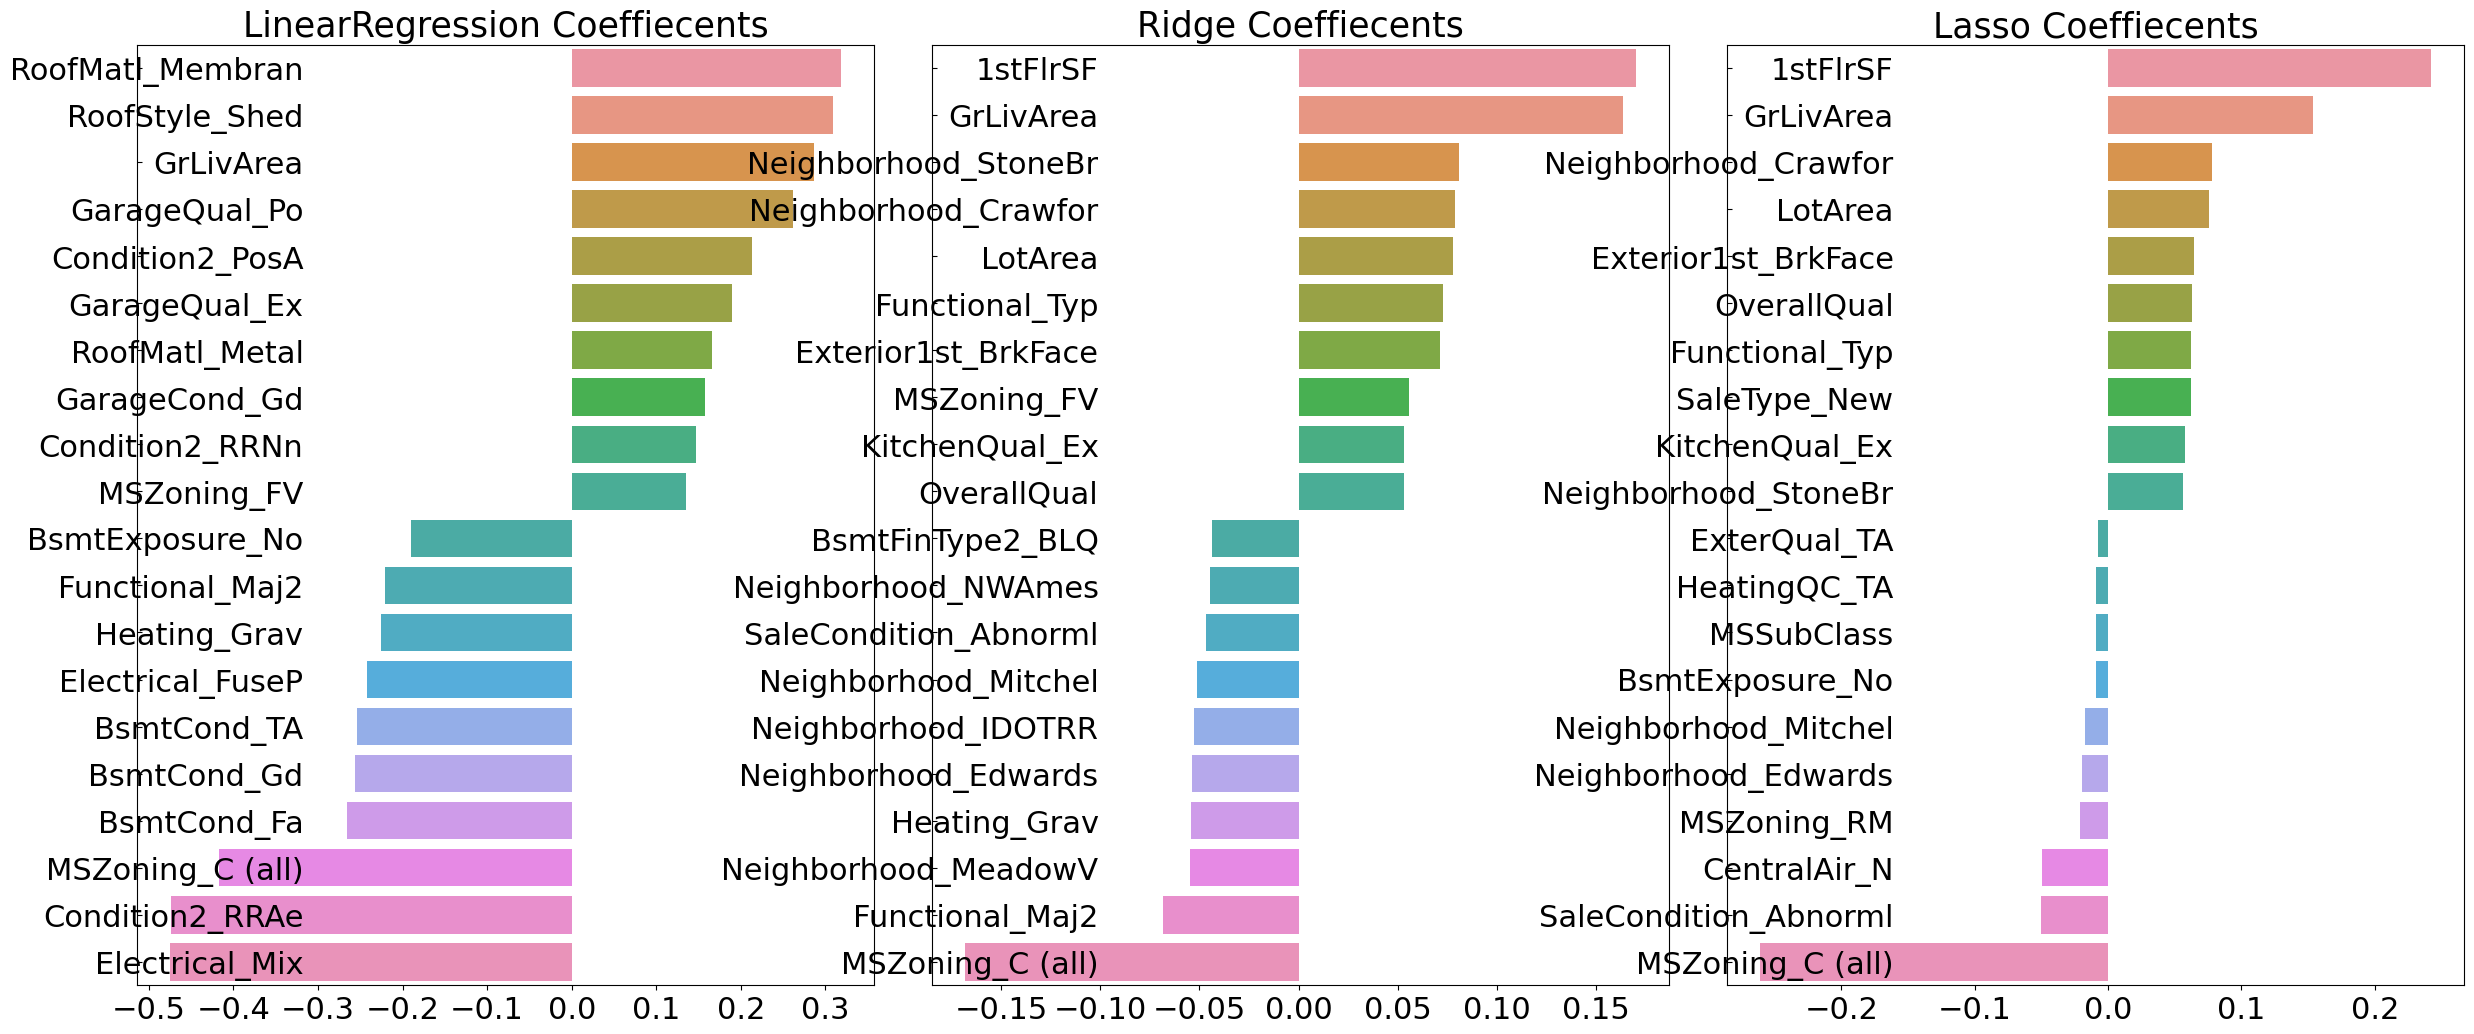

In [96]:
# 앞의 최적화 alpha값으로 학습데이터로 학습, 테스트 데이터로 예측 및 평가 수행.
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
ridge_reg = Ridge(alpha=8)
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)


# 모든 모델의 RMSE 출력
models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)


# 모든 모델의 회귀 계수 시각화
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

#### O 회귀 트리 모델 학습/예측/평가

In [97]:
from xgboost import XGBRegressor


xgb_params = {'n_estimators':[1000]}
xgb_reg = XGBRegressor(n_estimators=1000, learning_rate=0.05,
                       colsample_bytree=0.5, subsample=0.8)
best_xgb = print_best_params(xgb_reg, xgb_params)

XGBRegressor 5 CV 시 최적 평균 RMSE 값: 0.1174, 최적 alpha:{'n_estimators': 1000}


In [98]:

from lightgbm import LGBMRegressor


lgbm_params = {'n_estimators':[1000]}
lgbm_reg = LGBMRegressor(n_estimators=1000, learning_rate=0.05, num_leaves=4,
                         subsample=0.6, colsample_bytree=0.4, reg_lambda=10, n_jobs=-1)
best_lgbm = print_best_params(lgbm_reg, lgbm_params)



LGBMRegressor 5 CV 시 최적 평균 RMSE 값: 0.1179, 최적 alpha:{'n_estimators': 1000}


In [99]:
def get_rmse_pred(preds):
    for key in preds.keys():
        pred_value = preds[key]
        mse = mean_squared_error(y_test , pred_value)
        rmse = np.sqrt(mse)
        print('{0} 모델의 RMSE: {1}'.format(key, rmse))


# 개별 모델의 학습
ridge_reg = Ridge(alpha=8)
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)
# 개별 모델 예측
ridge_pred = ridge_reg.predict(X_test)
lasso_pred = lasso_reg.predict(X_test)


# 개별 모델 예측값 혼합으로 최종 예측값 도출
pred = 0.4 * ridge_pred + 0.6 * lasso_pred
preds = {'최종 혼합': pred,
         'Ridge': ridge_pred,
         'Lasso': lasso_pred}
#최종 혼합 모델, 개별모델의 RMSE 값 출력
get_rmse_pred(preds)


최종 혼합 모델의 RMSE: 0.10006075517615187
Ridge 모델의 RMSE: 0.10340697165289321
Lasso 모델의 RMSE: 0.10024171179335345


In [100]:
xgb_reg = XGBRegressor(n_estimators=1000, learning_rate=0.05,
                       colsample_bytree=0.5, subsample=0.8)
lgbm_reg = LGBMRegressor(n_estimators=1000, learning_rate=0.05, num_leaves=4,
                         subsample=0.6, colsample_bytree=0.4, reg_lambda=10, n_jobs=-1)
xgb_reg.fit(X_train, y_train)
lgbm_reg.fit(X_train, y_train)
xgb_pred = xgb_reg.predict(X_test)
lgbm_pred = lgbm_reg.predict(X_test)


pred = 0.5 * xgb_pred + 0.5 * lgbm_pred
preds = {'최종 혼합': pred,
         'XGBM': xgb_pred,
         'LGBM': lgbm_pred}
       
get_rmse_pred(preds)

최종 혼합 모델의 RMSE: 0.10230054833466655
XGBM 모델의 RMSE: 0.10682829901857346
LGBM 모델의 RMSE: 0.10363891833477148


#### O 회귀 모델의 예측 결과 혼합을 통한 최종 예측